##### top

# Find and fit curves of reliability vs num trials in all tasks in our battery


Tasks:
* [CCMT - Cambridge car memory test](#CCMT)
    
* [CFMT - Cambridge face memory test](#CFMT)

* [Car matching](#Car-matching)
    
* [Emotion matching](#Emotion-matching)
    
* [Emotion labelling](#Emotion-labelling)

* [Emotion matching and labelling combined](#Emotion-matching-and-labelling-combined)
    
* [FMP](#FMP)
    * [All measures separately](#FMP-All-measures-separately)

* [GFMT](#GFMT)
    
* [MST](#MST)
    * [LDI and REC](#LDI-and-REC)
        
* [PIM](#PIM)
    * [Multiple Choice](#MC)
    * [Recognition](#Recognition)
    
* [PGNG](#PGNG)
    * [Run PGNG score](#Run-PGNG-score)
    * [Run PGNG PCIT](#Run-PGNG-PCIT)
    * [Run PGNG PCTT](#Run-PGNG-PCTT)
    
* [RISE](#RISE)
    
* [SCAP](#SCAP)
    * [Run SCAP score](#Run-SCAP-score)
    * [Run SCAP Cowan](#Run-SCAP-Cowan)
    
* [n back](#n-back)
    * [Run n back acc](#Run-n-back-acc)
    * [Run n back d prime](#Run-n-back-d-prime)
    
* [Navon](#Navon)
    * [Accuracy](#Navon-accuracy)

* [VET birds](#VET-birds)
        
* [VET leaves](#VET-leaves)

* [VET planes](#VET-planes)


* [Plot the curves](#Plot-the-curves)    
---

* [Run one form for the paper](#Run-one-form-for-the-paper)

In [1]:
import os, sys
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define path and name
csv_raw_data_path = "../Data/raw_CSV"
csv_raw_pilot_data_path = "../Data/raw_CSV/piloting"
path_demo = '../Data/demographic_data/'

csv_clean_data_path = "../Data/cleaned_CSV" 
path_results = "../Data/results" 
path_curve_fit = os.path.join(path_results, "curve_fits")


# Importing module for functions
functions_modul =  "./functions"
sys.path.insert(0, functions_modul)
    
# import all processing and plotting functions
from reliability_functions import check_df_get_numbers, split_dataframes_faster_chunks, run_reliability_estimate4many_trials, get_statistics4many_trials
from composite_measures_functions import calculate_d_prime
from plot_functions import plot_convergence
    
test_names = []

# add a label for automatic load of the reliability measures
take_trials = None
if take_trials is not None:
    label = f'_trials{take_trials}'
else:
    label = ''

    
def check_noise_signal(df, n_noise, n_signal, n_trials_per_form, 
                       col="familiarity", signal_label="old", noise_label="new", verbose=False):

    # get number of trials per signal and noise
    n_signal_c = df[df[col]==signal_label].groupby('userID')[col].value_counts().unique()[0]
    n_noise_c  = df[df[col]==noise_label].groupby('userID')[col].value_counts().unique()[0]

    # check they're the same
    assert n_noise_c  == n_noise
    assert n_signal_c == n_signal

    # check that we have the right order
    if col=="familiarity":
        assert n_noise == n_signal
    elif col=="correct_response":
        assert n_noise > n_signal

    # check that the numbers are correct (eg we don't have missing trials)
    assert n_signal+n_noise == n_trials_per_form

    if verbose:
        print(f"There is {n_noise} noise (y) and {n_signal} (n) signal trials")

    # get ratios of number of signal and noise trials
    # signal, noise = (df.correct_memory_check_flt.value_counts()/df.correct_memory_check_flt.value_counts().sum()).values
    signal = n_signal/(n_trials_per_form)
    noise  = n_noise/(n_trials_per_form)

    # check that they sum to 1
    assert np.isclose(signal+noise, 1)
    
    return signal, noise
    

## CCMT
[top](#top)

In [2]:
# define manually num of trials
n_trials_per_form = 72
num_forms = 2

test="CCMT"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CCMT-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CCMT-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_CCMT_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'CCMT-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'CCMT-cleaned_data_rep.csv')),
])

# take only the full data
df_CCMT_concat = df_CCMT_concat[df_CCMT_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_CCMT_concat.userID.value_counts()[df_CCMT_concat.userID.value_counts()>num_forms*n_trials_per_form])#.keys()

Running 2 replicate studies with total 154 participants.
Series([], Name: userID, dtype: int64)


Total number of trials is 144.
Going over (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70) trials per task, ie. 14 items
Time per 5 trials: 2.08 s which is 0.03 min.
Time per 10 trials: 2.13 s which is 0.04 min.
Time per 15 trials: 2.23 s which is 0.04 min.
Time per 20 trials: 2.34 s which is 0.04 min.
Time per 25 trials: 2.38 s which is 0.04 min.
Time per 30 trials: 2.62 s which is 0.04 min.
Time per 35 trials: 2.64 s which is 0.04 min.
Time per 40 trials: 2.87 s which is 0.05 min.
Time per 45 trials: 2.89 s which is 0.05 min.
Time per 50 trials: 2.94 s which is 0.05 min.
Time per 55 trials: 2.99 s which is 0.05 min.
Time per 60 trials: 3.22 s which is 0.05 min.
Time per 65 trials: 3.23 s which is 0.05 min.
Time per 70 trials: 3.26 s which is 0.05 min.
Process took: 37.84 s which is 0.63 min.


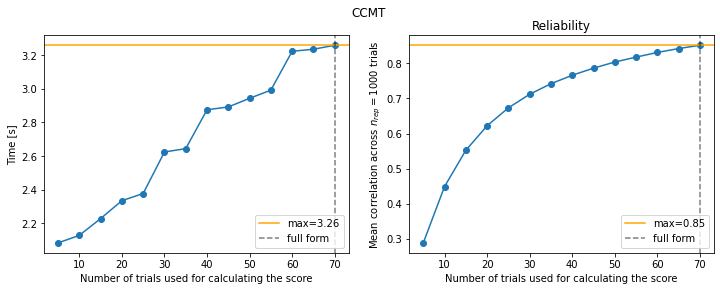

In [3]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_CCMT_concat, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_CCMT_concat, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_CCMT_concat, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()

# 36 s (0.6 min) per 1 000

## CFMT
[top](#top)

In [4]:
# define manually num of trials
n_trials_per_form = 72
num_forms = 5

test="CFMT"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_Aus2-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_F2-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_Aus-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_F-cleaned_data.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_CFMT_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_Aus2-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_F2-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_Aus-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_F-cleaned_data.csv')),
])

# take only the full data
df_CFMT_concat = df_CFMT_concat[df_CFMT_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_CFMT_concat.userID.value_counts()[df_CFMT_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

Running 5 replicate studies with total 58 participants.
Series([], Name: userID, dtype: int64)


Total number of trials is 360.
Going over (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180) trials per task, ie. 36 items
Time per 5 trials: 1.96 s which is 0.03 min.
Time per 10 trials: 1.97 s which is 0.03 min.
Time per 15 trials: 2.02 s which is 0.03 min.
Time per 20 trials: 2.10 s which is 0.03 min.
Time per 25 trials: 2.11 s which is 0.04 min.
Time per 30 trials: 2.14 s which is 0.04 min.
Time per 35 trials: 2.15 s which is 0.04 min.
Time per 40 trials: 2.23 s which is 0.04 min.
Time per 45 trials: 2.21 s which is 0.04 min.
Time per 50 trials: 2.23 s which is 0.04 min.
Time per 55 trials: 2.28 s which is 0.04 min.
Time per 60 trials: 2.30 s which is 0.04 min.
Time per 65 trials: 2.34 s which is 0.04 min.
Time per 70 trials: 2.39 s which is 0.04 min.
Time per 75 trials: 2.52 s which is 0.04 min.
Time per 80 trials: 2.53 s which is 0.04 min.
Time per 85 trials: 2.59 s which

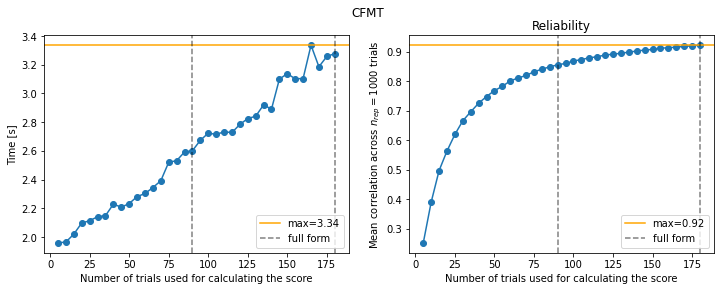

In [5]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_CFMT_concat, N)

# how many samples we want to correlate
n_repeats = 10**3


# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_CFMT_concat, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_CFMT_concat, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()

# 60 s (1 min) per 1 000

In [6]:
# # save
# pd.DataFrame(corr_array.T, columns=[f"n_trials_{x}" for x in n_trials_list]
#             ).to_csv(os.path.join(path_curve_fit, f"{test}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}.csv"), index=False)

# pd.DataFrame({"reliability":corr_array.mean(axis=1), 
#               "n_trials":n_trials_list}).to_csv(os.path.join(path_curve_fit, 
#                                                              f"{test}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"), index=False)

## Car matching
[top](#top)

In [7]:
# define manually num of trials
n_trials_per_form = 40
num_forms = 2

test="car_matching"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "car_matching-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "car_matching-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_car_matching_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'car_matching-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'car_matching-cleaned_data_rep.csv')),
])

# take only the full data
df_car_matching_concat = df_car_matching_concat[df_car_matching_concat["userID"].isin(shared_participants)].reset_index(drop=True)


# should be empty -- test if people don't have more than 1 entry
print(df_car_matching_concat.userID.value_counts()[df_car_matching_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

Running 2 replicate studies with total 173 participants.
Series([], Name: userID, dtype: int64)


Total number of trials is 80.
Going over (2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40) trials per task, ie. 20 items
Time per 2 trials: 1.95 s which is 0.03 min.
Time per 4 trials: 1.97 s which is 0.03 min.
Time per 6 trials: 2.04 s which is 0.03 min.
Time per 8 trials: 2.09 s which is 0.03 min.
Time per 10 trials: 2.11 s which is 0.04 min.
Time per 12 trials: 2.14 s which is 0.04 min.
Time per 14 trials: 2.20 s which is 0.04 min.
Time per 16 trials: 2.26 s which is 0.04 min.
Time per 18 trials: 2.40 s which is 0.04 min.
Time per 20 trials: 2.72 s which is 0.05 min.
Time per 22 trials: 2.52 s which is 0.04 min.
Time per 24 trials: 2.59 s which is 0.04 min.
Time per 26 trials: 2.95 s which is 0.05 min.
Time per 28 trials: 2.80 s which is 0.05 min.
Time per 30 trials: 3.21 s which is 0.05 min.
Time per 32 trials: 3.30 s which is 0.06 min.
Time per 34 trials: 3.06 s which is 0.05 min.
Time per 36 trials: 2.93 s which is 0.05 min.
Time per 38 trials: 3.19 s w

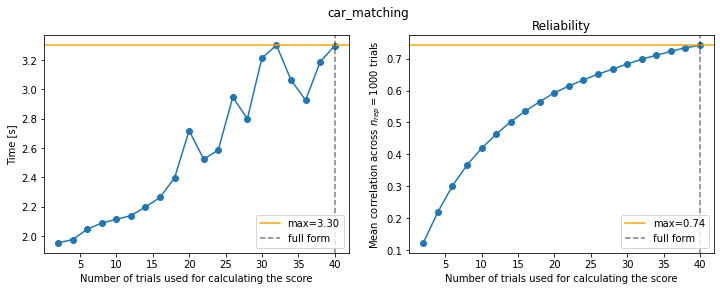

In [8]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_car_matching_concat, N)

# how many samples we want to correlate
n_repeats = 10**3

# have smaller steps for less trials
if total_n_trials<=100:
    step=3
else:
    step=5


# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_car_matching_concat, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_car_matching_concat, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()

# 47 s (0.8 min) per 1 000

In [9]:
# # save
# pd.DataFrame(corr_array.T, columns=[f"n_trials_{x}" for x in n_trials_list]
#             ).to_csv(os.path.join(path_curve_fit, f"{test}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}.csv"), index=False)

# pd.DataFrame({"reliability":corr_array.mean(axis=1), 
#               "n_trials":n_trials_list}).to_csv(os.path.join(path_curve_fit, 
#                                                              f"{test}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"), index=False)

## Emotion matching
[top](#top)

In [10]:
# define manually num of trials
n_trials_per_form = 65
num_forms = 2

test="emotion_matching"
# save the name so that we have easier job later
test_names.append(test)

# load the first set
df_emotion_matching = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_matching-cleaned_data.csv"))
df_emotion_matching["correct"] = df_emotion_matching["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print("Test first set")
print(df_emotion_matching.userID.value_counts()[df_emotion_matching.userID.value_counts()!=65])#.keys()

# load the second set
df_emotion_matching_stand = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_matching_rep-cleaned_data.csv"))
df_emotion_matching_stand["correct"] = df_emotion_matching_stand["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print("\nTest second set")
print(df_emotion_matching_stand.userID.value_counts()[df_emotion_matching_stand.userID.value_counts()!=100])#.keys()


######

# get names of stimulu
df_emotion_matching_stand["face1"] = df_emotion_matching_stand["face1"].str.split('/').str[-1]
df_emotion_matching_stand["face2"] = df_emotion_matching_stand["face2"].str.split('/').str[-1]
df_emotion_matching_stand["face3"] = df_emotion_matching_stand["face3"].str.split('/').str[-1]

# to be able to take the old trials only, here, I create a new variable "test" which is a combination of the 3 stimuli
# which uniquely determine a trial. Since the assignment of the stimuli to a column is random, we can simply compare.
# Therefore, I first combine the three cols, then sort values within this and convert it into a string. Using this
# string and userID, I then merge the two datasets --> that means that there are only the shared participants together
# with the overlapping trials
df_emotion_matching_stand["test"] = np.sort(df_emotion_matching_stand[["face1", "face2", "face3"]].values,axis=1).tolist()
df_emotion_matching["test"] = np.sort(df_emotion_matching[["face1", "face2", "face3"]].values,axis=1).tolist()

df_emotion_matching["test"]=df_emotion_matching["test"].apply(lambda x: ','.join(map(str, x)))
df_emotion_matching_stand["test"]=df_emotion_matching_stand["test"].apply(lambda x: ','.join(map(str, x)))

# merge the two dataframes to only take the intersection -- takes care of both userID and the shared target
df_merged = df_emotion_matching.merge(df_emotion_matching_stand, on=["userID", "test"])

# split it and make it into a long format, back, rename cols to be the same again
df_emotion_matching_concat = pd.concat([
    df_merged.loc[:,[x for x in df_merged.columns if x.endswith('_x') or x=='userID']].rename(columns = lambda x: x.strip('_x')),
    df_merged.loc[:,[x for x in df_merged.columns if x.endswith('_y') or x=='userID']].rename(columns = lambda x: x.strip('_y')),
])

# should be empty -- test if people don't have more than 1 entry
print("\nTest combined set")
print(df_emotion_matching_concat.userID.value_counts()[df_emotion_matching_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()
# this has for some reason 122

Test first set
Series([], Name: userID, dtype: int64)

Test second set
Series([], Name: userID, dtype: int64)

Test combined set
s_185    122
s_204    122
s_94     122
s_180    122
s_66     122
        ... 
s_93     122
s_70     122
s_219    122
s_106    122
s_131    122
Name: userID, Length: 161, dtype: int64


Total number of trials is 122.
Going over (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60) trials per task, ie. 12 items
Time per 5 trials: 2.15 s which is 0.04 min.
Time per 10 trials: 2.44 s which is 0.04 min.
Time per 15 trials: 2.66 s which is 0.04 min.
Time per 20 trials: 2.66 s which is 0.04 min.
Time per 25 trials: 2.56 s which is 0.04 min.
Time per 30 trials: 2.57 s which is 0.04 min.
Time per 35 trials: 3.01 s which is 0.05 min.
Time per 40 trials: 3.31 s which is 0.06 min.
Time per 45 trials: 3.40 s which is 0.06 min.
Time per 50 trials: 3.50 s which is 0.06 min.
Time per 55 trials: 3.71 s which is 0.06 min.
Time per 60 trials: 3.50 s which is 0.06 min.
Process took: 35.48 s which is 0.59 min.


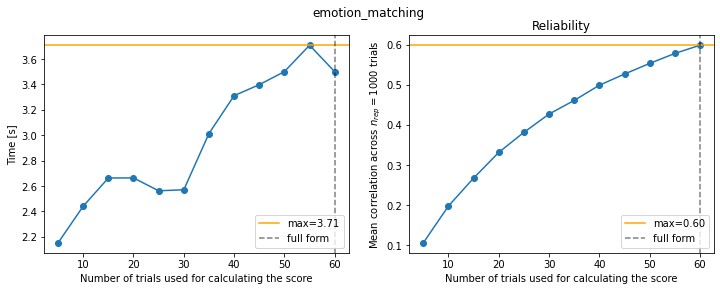

In [11]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(df_emotion_matching_concat["userID"].unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_emotion_matching_concat, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_emotion_matching_concat, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_emotion_matching_concat, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()
# 28 s (0.47 min) per 1 000

## Emotion labelling
[top](#top)

In [12]:
# define manually num of trials
n_trials_per_form = 48
num_forms = 2

test="emotion_labelling"
# save the name so that we have easier job later
test_names.append(test)

# load the first set
df_emotion_labelling = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_labelling-cleaned_data.csv"))
df_emotion_labelling["correct"] = df_emotion_labelling["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print("Test first set")
print(df_emotion_labelling.userID.value_counts()[df_emotion_labelling.userID.value_counts()!=n_trials_per_form])#.keys()

df_emotion_labelling_stand = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_labelling_rep-cleaned_data.csv"))
df_emotion_labelling_stand["correct"] = df_emotion_labelling_stand["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print("\nTest second set")
print(df_emotion_labelling_stand.userID.value_counts()[df_emotion_labelling_stand.userID.value_counts()>100])#.keys()


######

df_emotion_labelling_stand["target"] = df_emotion_labelling_stand["target"].str.split('/').str[-1]

# get participants who have both data
shared_participants = list(set(df_emotion_labelling['userID'])&set(df_emotion_labelling_stand['userID']))

# get target set of original stimuli
target_set = df_emotion_labelling.target.unique()

shared_target = list(set(df_emotion_labelling['target'])&set(df_emotion_labelling_stand['target']))
print(f"Running all replicate studies with total {len(shared_participants)} participants and {len(shared_target)} stimuli.")

df_emotion_labelling_concat = pd.concat([
    df_emotion_labelling_stand.loc[(df_emotion_labelling_stand["target"].isin(shared_target))&\
                                   (df_emotion_labelling_stand["userID"].isin(shared_participants))].copy(),
    df_emotion_labelling.loc[(df_emotion_labelling["target"].isin(shared_target))&\
                             (df_emotion_labelling["userID"].isin(shared_participants))].copy()
])

# should be empty -- test if people don't have more than 1 entry
print("\nTest combined set")
print(df_emotion_labelling_concat.userID.value_counts()[df_emotion_labelling_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()
# this has for some reason a different count

Test first set
Series([], Name: userID, dtype: int64)

Test second set
Series([], Name: userID, dtype: int64)
Running all replicate studies with total 166 participants and 45 stimuli.

Test combined set
s_185    90
s_143    90
s_94     90
s_180    90
s_66     90
         ..
s_219    90
s_106    90
s_192    90
s_100    90
s_131    90
Name: userID, Length: 166, dtype: int64


Total number of trials is 90.
Going over (2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44) trials per task, ie. 22 items
Time per 2 trials: 2.06 s which is 0.03 min.
Time per 4 trials: 2.09 s which is 0.03 min.
Time per 6 trials: 2.13 s which is 0.04 min.
Time per 8 trials: 2.14 s which is 0.04 min.
Time per 10 trials: 2.34 s which is 0.04 min.
Time per 12 trials: 2.33 s which is 0.04 min.
Time per 14 trials: 2.35 s which is 0.04 min.
Time per 16 trials: 2.52 s which is 0.04 min.
Time per 18 trials: 2.67 s which is 0.04 min.
Time per 20 trials: 2.72 s which is 0.05 min.
Time per 22 trials: 2.77 s which is 0.05 min.
Time per 24 trials: 2.66 s which is 0.04 min.
Time per 26 trials: 2.66 s which is 0.04 min.
Time per 28 trials: 2.59 s which is 0.04 min.
Time per 30 trials: 2.68 s which is 0.04 min.
Time per 32 trials: 2.81 s which is 0.05 min.
Time per 34 trials: 2.97 s which is 0.05 min.
Time per 36 trials: 3.08 s which is 0.05 min.
Time per 38 trials: 

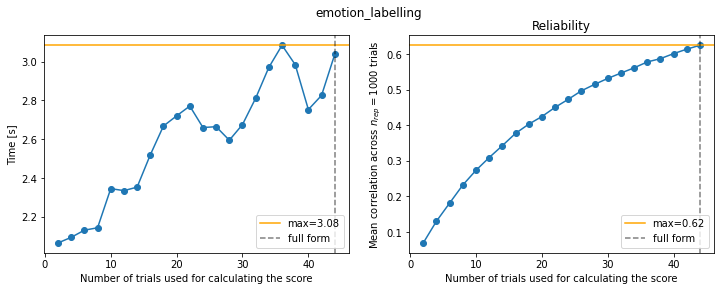

In [13]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(df_emotion_labelling_concat["userID"].unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_emotion_labelling_concat, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_emotion_labelling_concat, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_emotion_labelling_concat, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()

# 49 s (0.8 min) per 1 000

## Emotion matching and labelling combined
[top](#top)

If the ntb is not run, then uncomment and run the cell below, it loads the data

In [14]:
# # define manually num of trials
# n_trials_per_form = 65
# num_forms = 2

# test="emotion_matching"
# # save the name so that we have easier job later
# test_names.append(test)

# # load the first set
# df_emotion_matching = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_matching-cleaned_data.csv"))
# df_emotion_matching["correct"] = df_emotion_matching["correct"].astype(float)

# # should be empty -- test if people don't have more than 1 entry
# print("Test first set")
# print(df_emotion_matching.userID.value_counts()[df_emotion_matching.userID.value_counts()!=65])#.keys()

# # load the second set
# df_emotion_matching_stand = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_matching_rep-cleaned_data.csv"))
# df_emotion_matching_stand["correct"] = df_emotion_matching_stand["correct"].astype(float)

# # should be empty -- test if people don't have more than 1 entry
# print("\nTest second set")
# print(df_emotion_matching_stand.userID.value_counts()[df_emotion_matching_stand.userID.value_counts()!=100])#.keys()


# ######

# # get names of stimulu
# df_emotion_matching_stand["face1"] = df_emotion_matching_stand["face1"].str.split('/').str[-1]
# df_emotion_matching_stand["face2"] = df_emotion_matching_stand["face2"].str.split('/').str[-1]
# df_emotion_matching_stand["face3"] = df_emotion_matching_stand["face3"].str.split('/').str[-1]

# # to be able to take the old trials only, here, I create a new variable "test" which is a combination of the 3 stimuli
# # which uniquely determine a trial. Since the assignment of the stimuli to a column is random, we can simply compare.
# # Therefore, I first combine the three cols, then sort values within this and convert it into a string. Using this
# # string and userID, I then merge the two datasets --> that means that there are only the shared participants together
# # with the overlapping trials
# df_emotion_matching_stand["test"] = np.sort(df_emotion_matching_stand[["face1", "face2", "face3"]].values,axis=1).tolist()
# df_emotion_matching["test"] = np.sort(df_emotion_matching[["face1", "face2", "face3"]].values,axis=1).tolist()

# df_emotion_matching["test"]=df_emotion_matching["test"].apply(lambda x: ','.join(map(str, x)))
# df_emotion_matching_stand["test"]=df_emotion_matching_stand["test"].apply(lambda x: ','.join(map(str, x)))

# # merge the two dataframes to only take the intersection -- takes care of both userID and the shared target
# df_merged = df_emotion_matching.merge(df_emotion_matching_stand, on=["userID", "test"])

# # split it and make it into a long format, back, rename cols to be the same again
# df_emotion_matching_concat = pd.concat([
#     df_merged.loc[:,[x for x in df_merged.columns if x.endswith('_x') or x=='userID']].rename(columns = lambda x: x.strip('_x')),
#     df_merged.loc[:,[x for x in df_merged.columns if x.endswith('_y') or x=='userID']].rename(columns = lambda x: x.strip('_y')),
# ])

# # should be empty -- test if people don't have more than 1 entry
# print("\nTest combined set")
# print(df_emotion_matching_concat.userID.value_counts()[df_emotion_matching_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()
# # this has for some reason 122

# # define manually num of trials
# n_trials_per_form = 48
# num_forms = 2

# test="emotion_labelling"
# # save the name so that we have easier job later
# test_names.append(test)

# # load the first set
# df_emotion_labelling = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_labelling-cleaned_data.csv"))
# df_emotion_labelling["correct"] = df_emotion_labelling["correct"].astype(float)

# # should be empty -- test if people don't have more than 1 entry
# print("Test first set")
# print(df_emotion_labelling.userID.value_counts()[df_emotion_labelling.userID.value_counts()!=n_trials_per_form])#.keys()

# df_emotion_labelling_stand = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_labelling_rep-cleaned_data.csv"))
# df_emotion_labelling_stand["correct"] = df_emotion_labelling_stand["correct"].astype(float)

# # should be empty -- test if people don't have more than 1 entry
# print("\nTest second set")
# print(df_emotion_labelling_stand.userID.value_counts()[df_emotion_labelling_stand.userID.value_counts()>100])#.keys()


# ######

# df_emotion_labelling_stand["target"] = df_emotion_labelling_stand["target"].str.split('/').str[-1]

# # get participants who have both data
# shared_participants = list(set(df_emotion_labelling['userID'])&set(df_emotion_labelling_stand['userID']))

# # get target set of original stimuli
# target_set = df_emotion_labelling.target.unique()

# shared_target = list(set(df_emotion_labelling['target'])&set(df_emotion_labelling_stand['target']))
# print(f"Running all replicate studies with total {len(shared_participants)} participants and {len(shared_target)} stimuli.")

# df_emotion_labelling_concat = pd.concat([
#     df_emotion_labelling_stand.loc[(df_emotion_labelling_stand["target"].isin(shared_target))&\
#                                    (df_emotion_labelling_stand["userID"].isin(shared_participants))].copy(),
#     df_emotion_labelling.loc[(df_emotion_labelling["target"].isin(shared_target))&\
#                              (df_emotion_labelling["userID"].isin(shared_participants))].copy()
# ])

# # should be empty -- test if people don't have more than 1 entry
# print("\nTest combined set")
# print(df_emotion_labelling_concat.userID.value_counts()[df_emotion_labelling_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()
# # this has for some reason a different count

---
if it was already loaded, you can use this code

In [15]:
print(df_emotion_labelling_concat.userID.unique().size)
print(df_emotion_matching_concat.userID.unique().size)

shared_participants_combined_emo = list(set(df_emotion_labelling_concat['userID'])&set(df_emotion_matching_concat['userID']))

print("Total number of participants in combined emotions: ", len(shared_participants_combined_emo))

df_emotions = pd.concat([
    df_emotion_labelling_concat.loc[df_emotion_labelling_concat["userID"].isin(shared_participants_combined_emo), ["observation", "userID", "correct"]],
    df_emotion_matching_concat.loc[df_emotion_matching_concat["userID"].isin(shared_participants_combined_emo), ["observation", "userID", "correct"]],
])

print("Number of stimuli: ", df_emotions.userID.value_counts().unique())

166
161
Total number of participants in combined emotions:  152
Number of stimuli:  [212]


Total number of trials is 212.
Going over (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105) trials per task, ie. 21 items
Time per 5 trials: 2.40 s which is 0.04 min.
Time per 10 trials: 2.25 s which is 0.04 min.
Time per 15 trials: 2.31 s which is 0.04 min.
Time per 20 trials: 2.45 s which is 0.04 min.
Time per 25 trials: 2.48 s which is 0.04 min.
Time per 30 trials: 2.85 s which is 0.05 min.
Time per 35 trials: 3.16 s which is 0.05 min.
Time per 40 trials: 3.30 s which is 0.06 min.
Time per 45 trials: 3.30 s which is 0.05 min.
Time per 50 trials: 3.34 s which is 0.06 min.
Time per 55 trials: 3.11 s which is 0.05 min.
Time per 60 trials: 3.21 s which is 0.05 min.
Time per 65 trials: 3.43 s which is 0.06 min.
Time per 70 trials: 3.59 s which is 0.06 min.
Time per 75 trials: 3.73 s which is 0.06 min.
Time per 80 trials: 4.33 s which is 0.07 min.
Time per 85 trials: 4.09 s which is 0.07 min.
Time per 90 trials: 4.09 s which is 0.07 min.
Time per 95 tri

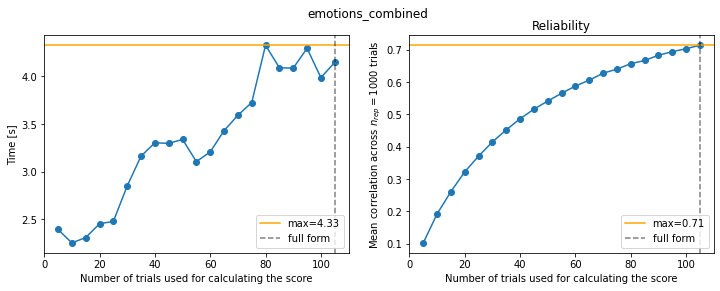

In [16]:
corr_array, trial_time, n_trials_list = None, None, None

test="emotions_combined"

# num of subjects
N = len(df_emotions["userID"].unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_emotions, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_emotions, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_emotions, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()
# 55 s (0.9 min) per 1 000

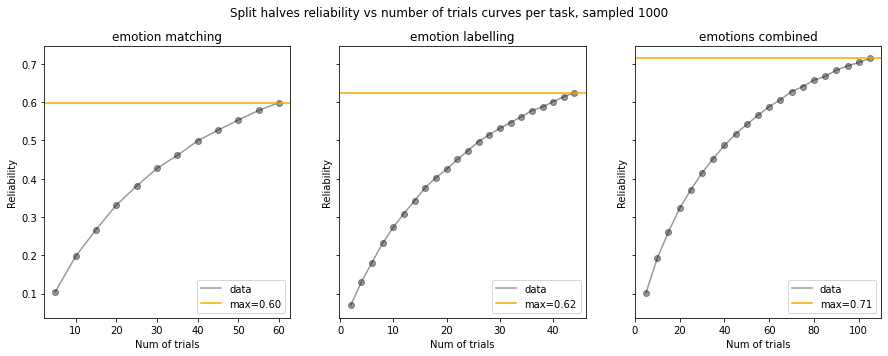

In [17]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)

for file, ax in zip([
    'emotion_matching_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
    'emotion_labelling_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
    'emotions_combined_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv'], axs.flatten()):

    df_tmp = None
    df_tmp = pd.read_csv(os.path.join(path_curve_fit, file))
    
    ax.plot(df_tmp["n_trials"], df_tmp["reliability"], c='k', label="data", alpha=0.4)
    ax.scatter(df_tmp["n_trials"], df_tmp["reliability"], c='k', alpha=0.4)
    # add max label
    ax.axhline(df_tmp["reliability"].max(), c="orange", label=f"max={df_tmp['reliability'].max():.2f}")  

    # this is wrong and I don't know how to do that
#     # add form label
#     ax.axvline(df_trials.loc[df_trials["Task"].str.startswith(tsk), "num_trials"].values[0], c="k", ls='--', alpha=0.5, label="full form")
    
    ax.set_title(' '.join(file.split('_')[:2]))
    ax.set_xlabel("Num of trials")
    ax.set_ylabel("Reliability")
    
    ax.legend(loc="lower right")
    
plt.suptitle("Split halves reliability vs number of trials curves per task, sampled 1000", y=.99)

plt.show()
    


## FMP
[top](#top)


this has data in a separate place together with all the analysis of FMP

In [18]:
# define manually num of trials
n_trials_per_form = 180
num_forms = 2

test="FMP"
# save the name so that we have easier job later
test_names.append(test)


if num_forms == 1:
    # get participants who have both data
    shared_participants = list(
        set(pd.read_csv(os.path.join(csv_clean_data_path, "FMP-cleaned_data.csv"), usecols=['userID']).userID)
    )

    # load and concat the datasets
    df_FMP_concat = pd.concat([
        pd.read_csv(os.path.join(csv_clean_data_path, 'FMP-cleaned_data.csv')),
    ])
    
else:
    # get participants who have both data
    shared_participants = list(
        set(pd.read_csv(os.path.join(csv_clean_data_path, "FMP-cleaned_data.csv"), usecols=['userID']).userID)&\
        set(pd.read_csv(os.path.join(csv_clean_data_path, "FMP-cleaned_data_rep.csv"), usecols=['userID']).userID)
    )
    
    # load and concat the datasets
    df_FMP_concat = pd.concat([
        pd.read_csv(os.path.join(csv_clean_data_path, 'FMP-cleaned_data.csv')),
        pd.read_csv(os.path.join(csv_clean_data_path, 'FMP-cleaned_data_rep.csv')),
    ])
    
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# take only the full data
df_FMP_concat = df_FMP_concat[df_FMP_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# take only what we really need
df_FMP_concat = df_FMP_concat[["userID", "task", "difficulty", "correct_flt"]].copy()

# should be empty -- test if people don't have more than 1 entry
print(df_FMP_concat.userID.value_counts()[df_FMP_concat.userID.value_counts()>num_forms*n_trials_per_form])#.keys()

Running 2 replicate studies with total 119 participants.
Series([], Name: userID, dtype: int64)


Total number of trials is 360.
Going over (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180) trials per task, ie. 36 items
Time per 5 trials: 2.24 s which is 0.04 min.
Time per 10 trials: 2.23 s which is 0.04 min.
Time per 15 trials: 2.30 s which is 0.04 min.
Time per 20 trials: 2.56 s which is 0.04 min.
Time per 25 trials: 2.44 s which is 0.04 min.
Time per 30 trials: 2.58 s which is 0.04 min.
Time per 35 trials: 2.62 s which is 0.04 min.
Time per 40 trials: 2.85 s which is 0.05 min.
Time per 45 trials: 3.52 s which is 0.06 min.
Time per 50 trials: 4.41 s which is 0.07 min.
Time per 55 trials: 3.67 s which is 0.06 min.
Time per 60 trials: 3.48 s which is 0.06 min.
Time per 65 trials: 3.34 s which is 0.06 min.
Time per 70 trials: 3.63 s which is 0.06 min.
Time per 75 trials: 3.73 s which is 0.06 min.
Time per 80 trials: 3.62 s which is 0.06 min.
Time per 85 trials: 3.56 s which

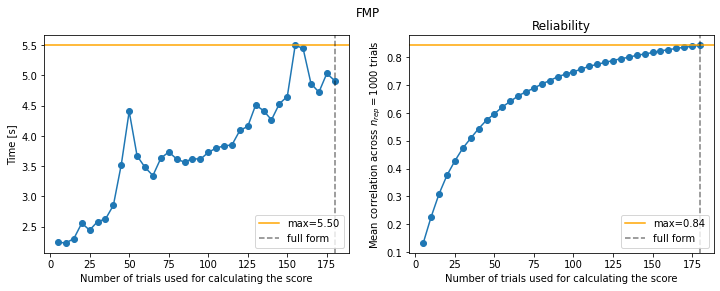

In [19]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_FMP_concat, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_FMP_concat, N, test, 
                                                                             measure='correct_flt', cols=['userID', 'correct_flt'],
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_FMP_concat, n_trials_list, save_merge=True, path=path_curve_fit, cols=['userID', 'correct_flt'],measure='correct_flt',
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()
# 78 s (1.3 min) per 1 000

### FMP All measures separately
[top](#top)

In [20]:
# task_order = ["perception", "blank", "faces"]


# for tsk in task_order:
#     print(f"Task: {tsk}")
#     test=f"FMP_{tsk}"
#     # save the name so that we have easier job later
#     test_names.append(test)

#     corr_array, trial_time, n_trials_list = None, None, None
#     df_fmp_shuffle=None
    
#     # select trials per the given tasks, sort it by userID and num_done to be sure we take the same trials
#     df_fmp_shuffle = df_FMP_concat.sort_values(by=["userID"]).loc[df_FMP_concat["task"]==tsk, ["userID", "correct_flt"]].copy()

#     # max number of trials
#     total_n_trials = check_df_get_numbers(df_fmp_shuffle, N)

#     # num of subjects
#     N = len(df_fmp_shuffle.userID.unique())

#     # how many samples we want to correlate
#     n_repeats = 10**3

#     # run the simulation
#     corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_fmp_shuffle, N, test, 
#                                                                                  measure='correct_flt', cols=['userID', 'correct_flt'],
#                                                                                  n_repeats=n_repeats, num_forms=num_forms,
#                                                                                  path_curve_fit=path_curve_fit)

#     # get statistics of the task
#     _ = get_statistics4many_trials(df_fmp_shuffle, n_trials_list, save_merge=True, path=path_curve_fit, cols=['userID', 'correct_flt'], measure='correct_flt',
#                                    file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
#                                    )

#     # plot
#     fig, axs = plt.subplots(1,2, figsize=(12,4))

#     # plot time
#     plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
#     axs[0].set_ylabel('Time [s]')

#     # plot reliability
#     plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
#     axs[1].set_title('Reliability')
#     plt.suptitle(test)
#     plt.show()
#     # ~45 s (0.7 min) per 1 000 per one

# #    

---

## GFMT
[top](#top)

In [29]:
# define manually num of trials
n_trials_per_form = 40
num_forms = 4

test="GFMT"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "GFMT-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "GFMT-cleaned_data_rep.csv"), usecols=['userID']).userID)
)

# get overlaping stimuli
shared_target = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "GFMT-cleaned_data.csv"), usecols=['FaceStim']).FaceStim)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "GFMT-cleaned_data_rep.csv"), usecols=['FaceStim']).FaceStim)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants and {len(shared_target)} stimuli.")


# load and concat the datasets
df_GFMT_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'GFMT-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'GFMT-cleaned_data_rep.csv')),
])

# take only the full data
df_GFMT_concat = df_GFMT_concat[(df_GFMT_concat["FaceStim"].isin(shared_target))&(df_GFMT_concat["userID"].isin(shared_participants))].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_GFMT_concat.userID.value_counts()[df_GFMT_concat.userID.value_counts()>num_forms*n_trials_per_form])#.keys()

Running 4 replicate studies with total 157 participants and 40 stimuli.
Series([], Name: userID, dtype: int64)


Total number of trials is 80.
Going over (2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40) trials per task, ie. 20 items
Time per 2 trials: 2.06 s which is 0.03 min.
Time per 4 trials: 2.15 s which is 0.04 min.
Time per 6 trials: 2.27 s which is 0.04 min.
Time per 8 trials: 2.21 s which is 0.04 min.
Time per 10 trials: 2.22 s which is 0.04 min.
Time per 12 trials: 2.16 s which is 0.04 min.
Time per 14 trials: 2.23 s which is 0.04 min.
Time per 16 trials: 2.37 s which is 0.04 min.
Time per 18 trials: 2.27 s which is 0.04 min.
Time per 20 trials: 2.46 s which is 0.04 min.
Time per 22 trials: 2.43 s which is 0.04 min.
Time per 24 trials: 2.48 s which is 0.04 min.
Time per 26 trials: 2.53 s which is 0.04 min.
Time per 28 trials: 2.69 s which is 0.04 min.
Time per 30 trials: 2.67 s which is 0.04 min.
Time per 32 trials: 2.73 s which is 0.05 min.
Time per 34 trials: 2.76 s which is 0.05 min.
Time per 36 trials: 2.68 s which is 0.04 min.
Time per 38 trials: 2.64 s w

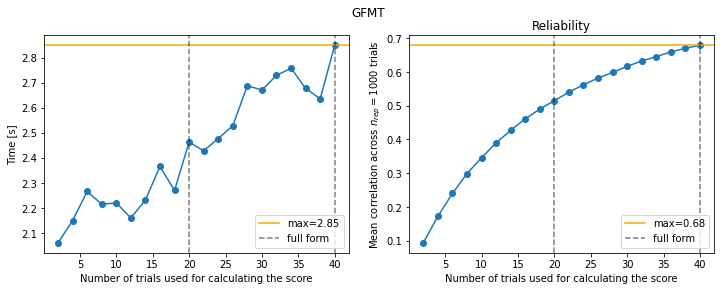

In [30]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_GFMT_concat, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_GFMT_concat, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_GFMT_concat, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )
# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()
# 43 s (0.7 min) per 1 000

## MST
[top](#top)

In [31]:
# define manually num of trials
n_trials_per_form = 320
num_forms = 2

test="MST"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "MST-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "MST-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_MST_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'MST-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'MST-cleaned_data_rep.csv')),
])

# take only the full data
df_MST_concat = df_MST_concat[df_MST_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_MST_concat.userID.value_counts()[df_MST_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

# drop the people who do not have two full sets -- TODO, decide, maybe can be filled
df_MST_concat = df_MST_concat[df_MST_concat["userID"].isin(df_MST_concat.userID.value_counts()[df_MST_concat.userID.value_counts()==num_forms*n_trials_per_form].keys())]

print(df_MST_concat.userID.value_counts()[df_MST_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

Running 2 replicate studies with total 84 participants.
Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)


Total number of trials is 640.
Going over (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320) trials per task, ie. 64 items
Time per 5 trials: 2.20 s which is 0.04 min.
Time per 10 trials: 2.44 s which is 0.04 min.
Time per 15 trials: 2.52 s which is 0.04 min.
Time per 20 trials: 2.54 s which is 0.04 min.
Time per 25 trials: 2.60 s which is 0.04 min.
Time per 30 trials: 2.73 s which is 0.05 min.
Time per 35 trials: 2.77 s which is 0.05 min.
Time per 40 trials: 2.56 s which is 0.04 min.
Time per 45 trials: 2.57 s which is 0.04 min.
Time per 50 trials: 2.61 s which is 0.04 min.
Time per 55 trials: 2.71 s which is 0.05 min.
Time per 60 trials: 2.73 s which is 0.05 min.
Time per 65 trials: 2.89 s which is 0.05 min.
Time per 70 trials: 2.87 s whi

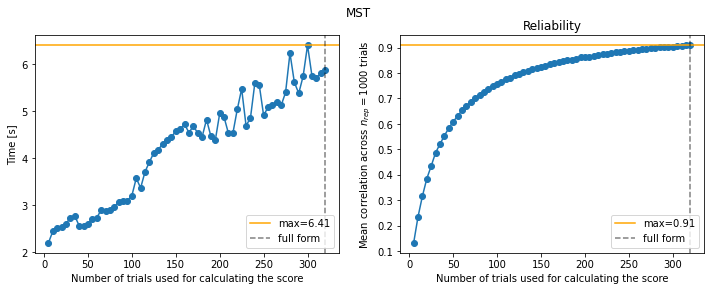

In [32]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(df_MST_concat.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_MST_concat, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_MST_concat, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_MST_concat, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )
# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()
# 300 s (5 min) per 1 000

### LDI and REC
[top](#top)

In [33]:
# standardise
df_MST_concat = df_MST_concat.sort_values(by=["userID"])
# set userID to be a category to easier deal with NANs and zeros later -- no sure if needed, can be done as in 
# the code above but this eliminates the use to create a df
df_MST_concat.userID = df_MST_concat.userID.astype('category')
# https://stackoverflow.com/questions/46752347/why-does-value-count-method-in-pandas-returns-a-zero-count
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

# define a dict of the subtasks and the num trials per each of the subtasks
MST_categories_num_trials = {
    "targets": num_forms*64,
    "foils":   num_forms*64,
    "lures":   num_forms*64,
}

# pre-define the data -- note the naming, must correspond to the keys in the dict above
df_targets = df_MST_concat[(df_MST_concat["trial_type"] == "repeat")&(df_MST_concat["repetition"] == "b")].copy()
df_foils   = df_MST_concat[(df_MST_concat["trial_type"] == "foil")].copy()
df_lures   = df_MST_concat[(df_MST_concat["trial_type"] == "lure")&(df_MST_concat["repetition"] == "b")].copy()

# checks for num of trials per user
assert (df_targets["userID"].value_counts()==MST_categories_num_trials["targets"]).all()
assert (df_foils["userID"].value_counts()==MST_categories_num_trials["foils"]).all()
assert (df_lures["userID"].value_counts()==MST_categories_num_trials["lures"]).all()

# check that the three different categories have the same number of trials
assert MST_categories_num_trials["lures"] == MST_categories_num_trials["targets"] == MST_categories_num_trials["foils"]



# num of subjects
N = len(df_MST_concat.userID.unique())

# max number of trials
total_n_trials = []
n_trials = []

# go over all keys in the dict
for i,key in enumerate(MST_categories_num_trials.keys()):
    # append max trials per the given df -- assume naming df_name
    total_n_trials.append(check_df_get_numbers(eval("df_"+key), N))
    
    # check with what is known
    assert total_n_trials[i] == MST_categories_num_trials[key]
    
# how many samples we want to correlate
n_repeats = 10**3

# define step
step=4


n_trials_list = np.arange(step, (total_n_trials[i]+step)//2, step)
print(f"Going over {*n_trials_list,} trials per category, ie. {len(n_trials_list)} items")

# define corr array
MST_LDI_concat_array_corr = np.zeros((len(n_trials_list),n_repeats))
MST_REC_concat_array_corr = np.zeros((len(n_trials_list),n_repeats))
trial_time = np.zeros(len(n_trials_list))
    
# do statistics - define the dataframe
df_measures_REC = pd.DataFrame()
df_measures_LDI = pd.DataFrame()

# start the timer
start = time.time()

for j, n_trials in enumerate(n_trials_list):

    start_trial = time.time()

    # go over iterations
    for i in range(n_repeats):
        df_tar1 = None
        df_tar2 = None
        df_foi1 = None
        df_foi2 = None
        df_lur1 = None
        df_lur2 = None

        # split the data into two halves, do it separately for each category -- different then in the other ntb, assumes the same n_trials per category
        df_tar1, df_tar2 = split_dataframes_faster_chunks(df_targets, MST_categories_num_trials["targets"], n_trials, N)
        df_foi1, df_foi2 = split_dataframes_faster_chunks(df_foils,   MST_categories_num_trials["foils"],   n_trials, N)
        df_lur1, df_lur2 = split_dataframes_faster_chunks(df_lures,   MST_categories_num_trials["lures"],   n_trials, N)


        # for the following it assumes that the number of trials are the same for each subject -- checked before
    #     LDI = (num_sim_lure/MST_categories_num_trials["lures"]) - (num_sim_foil/MST_categories_num_trials["foils"])
    #     REC = (num_hits/MST_categories_num_trials["targets"]) - (num_FA/MST_categories_num_trials["foils"])

        
        # this is using wrong scaling that is ok for reliability but not for the statistics. It uses the entire number of lures, foils and targets
        # which is ok for the full sample but not for parts
#         # LDI 
#         LDI_first =  (df_lur1[df_lur1["response"]=="similar"].userID.value_counts()/MST_categories_num_trials["lures"])-(df_foi1[df_foi1.response=='similar'].userID.value_counts()/MST_categories_num_trials["foils"])
#         LDI_second = (df_lur2[df_lur2["response"]=="similar"].userID.value_counts()/MST_categories_num_trials["lures"])-(df_foi2[df_foi2.response=='similar'].userID.value_counts()/MST_categories_num_trials["foils"]) 

#         # REC
#         REC_first =  (df_tar1[df_tar1["response"] == "old"].userID.value_counts()/MST_categories_num_trials["targets"])-(df_foi1[df_foi1.response=='old'].userID.value_counts()/MST_categories_num_trials["foils"])
#         REC_second = (df_tar2[df_tar2["response"] == "old"].userID.value_counts()/MST_categories_num_trials["targets"])-(df_foi2[df_foi2.response=='old'].userID.value_counts()/MST_categories_num_trials["foils"])

        # to avoid the issue mentioned above, we have to divide by real the number of lures,targets,foils and here we
        # assume that the number is the SAME across the categories -- again, checked above but could be potentially different
        # LDI 
        LDI_first =  (df_lur1[df_lur1["response"]=="similar"].userID.value_counts()/n_trials)-(df_foi1[df_foi1.response=='similar'].userID.value_counts()/n_trials)
        LDI_second = (df_lur2[df_lur2["response"]=="similar"].userID.value_counts()/n_trials)-(df_foi2[df_foi2.response=='similar'].userID.value_counts()/n_trials) 

        # REC
        REC_first =  (df_tar1[df_tar1["response"] == "old"].userID.value_counts()/n_trials)-(df_foi1[df_foi1.response=='old'].userID.value_counts()/n_trials)
        REC_second = (df_tar2[df_tar2["response"] == "old"].userID.value_counts()/n_trials)-(df_foi2[df_foi2.response=='old'].userID.value_counts()/n_trials)

        # check that n(userID) == N to verify that we have all subjects and no NANs/missing
        assert N == LDI_first.size
        assert N == LDI_second.size
        assert N == REC_first.size
        assert N == REC_second.size


        # calculate correlation
        MST_LDI_concat_array_corr[j,i] = LDI_first.corr(LDI_second, method='pearson')
        MST_REC_concat_array_corr[j,i] = REC_first.corr(REC_second, method='pearson')
        
    ## add statistics
    ## the mean (and var) is the same computation since the measure is already one number per participant

    # randomly sample number of trials per subject
    df_tmp = LDI_first.copy()
    # create statistics
    df_measures_LDI = df_measures_LDI.append(pd.DataFrame({
        "n_trials": [n_trials],
        "mean": df_tmp.mean(),
        "sd": df_tmp.std(),
        "var": df_tmp.var(),
        "sem": df_tmp.std() / np.sqrt(n_trials),
        "mean_p": df_tmp.mean(),
        "var_p": df_tmp.var(),
    }))
    
    # randomly sample number of trials per subject
    df_tmp = REC_first.copy()
    # create statistics
    df_measures_REC = df_measures_REC.append(pd.DataFrame({
        "n_trials": [n_trials],
        "mean": df_tmp.mean(),
        "sd": df_tmp.std(),
        "var": df_tmp.var(),
        "sem": df_tmp.std() / np.sqrt(n_trials),
        "mean_p": df_tmp.mean(),
        "var_p": df_tmp.var(),
    }))

    # save time
    trial_time[j] = time.time()-start_trial
    print(f"Time per {n_trials} trials: {trial_time[j]:.2f} s which is {trial_time[j]/60:.2f} min.")

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 41 s per 100 (step 5), 49 s per 100 (step 4)
# 407 s (6.9 min) per 1 000 (step 5), 401 s (6.8 min) for step 4

Total number of trials is 128.
Total number of trials is 128.
Total number of trials is 128.
Going over (4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64) trials per category, ie. 16 items
Time per 4 trials: 22.85 s which is 0.38 min.
Time per 8 trials: 25.98 s which is 0.43 min.
Time per 12 trials: 25.25 s which is 0.42 min.
Time per 16 trials: 25.15 s which is 0.42 min.
Time per 20 trials: 24.86 s which is 0.41 min.
Time per 24 trials: 25.07 s which is 0.42 min.
Time per 28 trials: 25.18 s which is 0.42 min.
Time per 32 trials: 25.41 s which is 0.42 min.
Time per 36 trials: 27.86 s which is 0.46 min.
Time per 40 trials: 29.01 s which is 0.48 min.
Time per 44 trials: 26.91 s which is 0.45 min.
Time per 48 trials: 25.35 s which is 0.42 min.
Time per 52 trials: 27.01 s which is 0.45 min.
Time per 56 trials: 27.29 s which is 0.45 min.
Time per 60 trials: 26.14 s which is 0.44 min.
Time per 64 trials: 26.87 s which is 0.45 min.
Process took: 416.19 s which is 6.94 min.


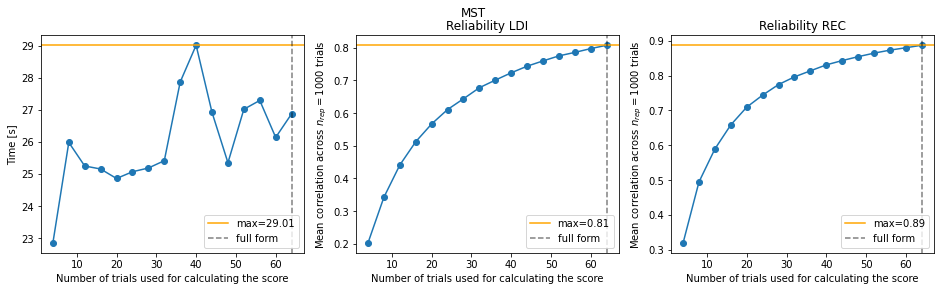

In [34]:
# plot
fig, axs = plt.subplots(1,3, figsize=(16,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(MST_LDI_concat_array_corr, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability LDI')

# plot reliability
plot_convergence(MST_REC_concat_array_corr, n_trials_list, axs[2], k=num_forms//2)
axs[2].set_title('Reliability REC')

plt.suptitle(test)
plt.show()

In [35]:
# save
pd.DataFrame(MST_LDI_concat_array_corr.T, columns=[f"n_trials_{x}" for x in n_trials_list]
            ).to_csv(os.path.join(path_curve_fit, f"{test}_LDI_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}.csv"), index=False)

# pd.DataFrame({"reliability":MST_LDI_concat_array_corr.mean(axis=1), 
#               "n_trials":n_trials_list}).to_csv(os.path.join(path_curve_fit, 
#                                                              f"{test}_LDI_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"), index=False)
df_measures_LDI.insert(1, "reliability", np.nanmean(MST_LDI_concat_array_corr, axis=1))
df_measures_LDI.to_csv(os.path.join(path_curve_fit, 
                                f"{test}_LDI_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"),
                   index=False)

# save
pd.DataFrame(MST_REC_concat_array_corr.T, columns=[f"n_trials_{x}" for x in n_trials_list]
            ).to_csv(os.path.join(path_curve_fit, f"{test}_REC_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}.csv"), index=False)

# pd.DataFrame({"reliability":MST_REC_concat_array_corr.mean(axis=1), 
#               "n_trials":n_trials_list}).to_csv(os.path.join(path_curve_fit, 
#                                                              f"{test}_REC_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"), index=False)

df_measures_REC.insert(1, "reliability", np.nanmean(MST_REC_concat_array_corr, axis=1))
df_measures_REC.to_csv(os.path.join(path_curve_fit, 
                                f"{test}_REC_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"),
                   index=False)


test_names.append("MST_REC")
test_names.append("MST_LDI")

## PIM
[top](#top)

### MC
[top](#top)

In [37]:
# define manually num of trials
n_trials_per_form = 24
num_forms = 2

# test="PIM_MC"
# # save the name so that we have easier job later
# test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PIM_MC-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PIM_MC-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies (in total {num_forms}) with total {len(shared_participants)} participants.")

# load and concat the datasets
df_PIM_MC_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'PIM_MC-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'PIM_MC-cleaned_data_rep.csv')),
])

# take only the full data
df_PIM_MC_concat = df_PIM_MC_concat[df_PIM_MC_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_PIM_MC_concat.userID.value_counts()[df_PIM_MC_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

Running 2 replicate studies (in total 2) with total 152 participants.
Series([], Name: userID, dtype: int64)


#### Run separately all the subtasks

Total number of trials is 48.
Going over (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23) trials per task, ie. 23 items
Taking 1 trials.
Time per 1 trials: 6.94 s which is 0.12 min.
Taking 2 trials.
Time per 2 trials: 7.46 s which is 0.12 min.
Taking 3 trials.
Time per 3 trials: 7.73 s which is 0.13 min.
Taking 4 trials.
Time per 4 trials: 7.07 s which is 0.12 min.
Taking 5 trials.
Time per 5 trials: 7.31 s which is 0.12 min.
Taking 6 trials.
Time per 6 trials: 8.14 s which is 0.14 min.
Taking 7 trials.
Time per 7 trials: 8.01 s which is 0.13 min.
Taking 8 trials.
Time per 8 trials: 7.43 s which is 0.12 min.
Taking 9 trials.
Time per 9 trials: 7.70 s which is 0.13 min.
Taking 10 trials.
Time per 10 trials: 7.63 s which is 0.13 min.
Taking 11 trials.
Time per 11 trials: 7.39 s which is 0.12 min.
Taking 12 trials.
Time per 12 trials: 7.90 s which is 0.13 min.
Taking 13 trials.
Time per 13 trials: 7.81 s which is 0.13 min.
Taking 14 trials.
Time per 14 t

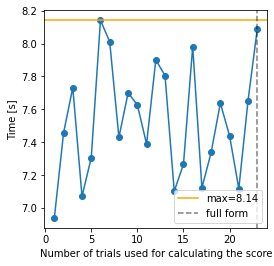

In [38]:
MC_tasks = ['hobby', 'vice', 'country', 'code_name']

# num of subjects
N = len(df_PIM_MC_concat.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_PIM_MC_concat, N)
# check with what is known
assert total_n_trials == num_forms*n_trials_per_form

# how many samples we want to correlate
n_repeats = 10**3
step = 1

# create the num_trials array
n_trials_list = np.arange(step, (total_n_trials+step)//2, step)
print(f"Going over {*n_trials_list,} trials per task, ie. {len(n_trials_list)} items")

# define corr array
PIM_MC_array_corr_psychofit = np.zeros((len(n_trials_list), len(MC_tasks),n_repeats))
trial_time = np.zeros(len(n_trials_list))
    
# define the df
df_sort = df_PIM_MC_concat.sort_values(by=["userID"])#[["userID", "correct"]]

# start the timer
start = time.time()
    

for j, n_trials in enumerate(n_trials_list):

    start_trial = time.time()
    print(f"Taking {n_trials} trials.")

    # check that it's possible
    assert n_trials <= total_n_trials//2


    # go over iterations
    for i in range(n_repeats):
        df_PIM_MC_concat_first = None
        df_PIM_MC_concat_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_PIM_MC_concat_first, df_PIM_MC_concat_second = split_dataframes_faster_chunks(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        PIM_corr = df_PIM_MC_concat_first.groupby(["userID"]).mean().corrwith(df_PIM_MC_concat_second.groupby(["userID"]).mean(),
                                                            method='pearson')
        # check the order to make sure I put the right values to the right place
        assert PIM_corr.index.tolist() == MC_tasks
        PIM_MC_array_corr_psychofit[j,:,i] = PIM_corr.values

    # save the time
    trial_time[j] = time.time()-start_trial
    print(f"Time per {n_trials} trials: {trial_time[j]:.2f} s which is {trial_time[j]/60:.2f} min.")

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 7.92 s per 100
# 77 s (1.3 min) per 10 000


# plot
fig, ax = plt.subplots(1,1, figsize=(4,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, ax, k=num_forms//2)
ax.set_ylabel('Time [s]')

plt.show()
# 1204 s which is (3.4 min) per 1 000

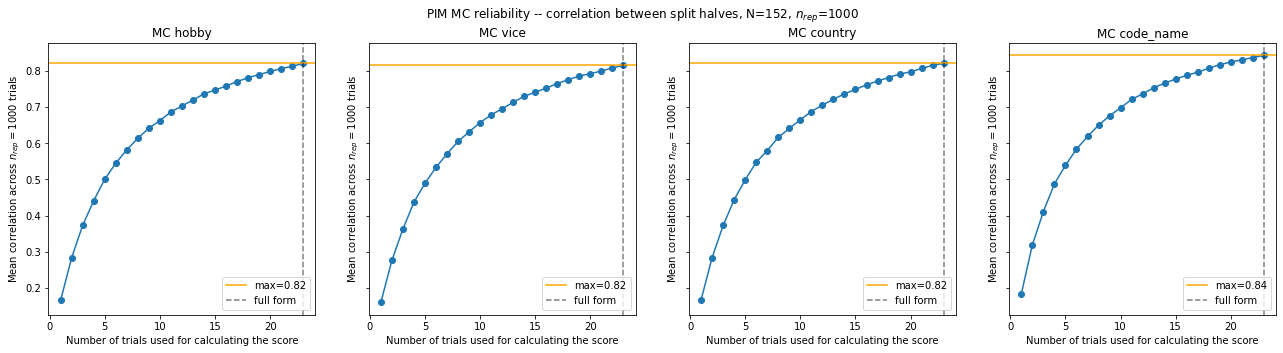

In [39]:
fig, axs = plt.subplots(1, 4, figsize=(22,5), sharey=True, sharex=True)

for (i, tsk), ax in zip(enumerate(MC_tasks), axs.flatten()):    
    plot_convergence(PIM_MC_array_corr_psychofit[:,i,:], n_trials_list, ax, k=num_forms//2)
    ax.set_title(f"MC {tsk}")


plt.suptitle(f"PIM MC reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")
plt.show()

In [40]:
# save

for i,tsk in enumerate(MC_tasks):
    # save the name so that we have easier job later
    test_names.append(f"PIM_MC_{tsk}")
    
    pd.DataFrame(PIM_MC_array_corr_psychofit[:,i,:].T, columns=[f"n_trials_{x}" for x in n_trials_list]
            ).to_csv(os.path.join(path_curve_fit, f"PIM_MC_{tsk}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}.csv"), index=False)

    pd.DataFrame({"reliability":PIM_MC_array_corr_psychofit[:,i,:].mean(axis=1), 
              "n_trials":n_trials_list}).to_csv(os.path.join(path_curve_fit, 
                                                             f"PIM_MC_{tsk}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"), index=False)

    
    # do statistics separately on the tasks - TODO check
    _ = get_statistics4many_trials(df_PIM_MC_concat[["userID",tsk]], n_trials_list, cols=["userID",tsk], measure=tsk,
                                   save_merge=True, path=path_curve_fit, 
                               file=f"PIM_MC_{tsk}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )
    
    

#### Combine all four measures
[top](#top)

Total number of trials is 192.
Going over (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95) trials per task, ie. 95 items
Time per 1 trials: 2.28 s which is 0.04 min.
Time per 2 trials: 2.39 s which is 0.04 min.
Time per 3 trials: 2.29 s which is 0.04 min.
Time per 4 trials: 2.25 s which is 0.04 min.
Time per 5 trials: 2.33 s which is 0.04 min.
Time per 6 trials: 2.40 s which is 0.04 min.
Time per 7 trials: 2.46 s which is 0.04 min.
Time per 8 trials: 2.34 s which is 0.04 min.
Time per 9 trials: 2.38 s which is 0.04 min.
Time per 10 trials: 2.39 s which is 0.04 min.
Time per 11 trials: 2.39 s which is 0.04 min.
Time per 12 trials: 2.40 s which is 0.04 min.
Time per 13 t

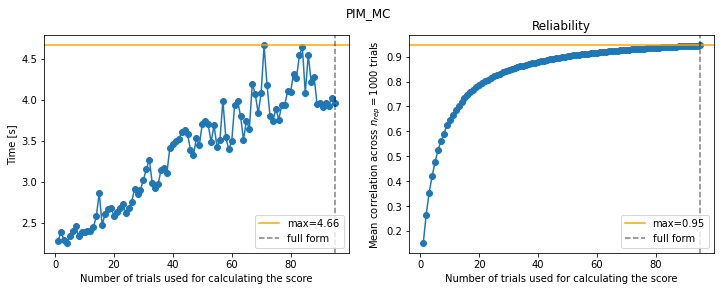

In [41]:
corr_array, trial_time, n_trials_list = None, None, None

# concat and rename the cols to have only one
df_PIM_MC = pd.concat(
    [df_PIM_MC_concat[["userID",x]].rename(columns={x:"correct"}) for x in MC_tasks]
)
test="PIM_MC"
# save the name so that we have easier job later
test_names.append(test)

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_PIM_MC, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_PIM_MC, N, test, step=1, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_PIM_MC, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()
# 359 s which is (6 min) per 1 000

### Recognition
[top](#top)


Here I'd do two things:

1. look at pure accuracy
2. scale the accuracy by confidence (0-5)

In [42]:
# define manually num of trials
n_trials_per_form = 2*2*24
num_forms = 2

test="PIM_recog"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PIM_recog-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PIM_recog-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies (in total {num_forms}) with total {len(shared_participants)} participants.")

# load and concat the datasets
df_PIM_recog_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'PIM_recog-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'PIM_recog-cleaned_data_rep.csv')),
])

# take only the full data
df_PIM_recog_concat = df_PIM_recog_concat[df_PIM_recog_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_PIM_recog_concat.userID.value_counts()[df_PIM_recog_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

# drop those people for now
df_PIM_recog_concat = df_PIM_recog_concat[~df_PIM_recog_concat["userID"].isin(df_PIM_recog_concat.userID.value_counts()[df_PIM_recog_concat.userID.value_counts()!=(num_forms*n_trials_per_form)].keys())]

# check again
print("\nCheck again")
print(df_PIM_recog_concat.userID.value_counts()[df_PIM_recog_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

# convert correct
df_PIM_recog_concat["correct"] = df_PIM_recog_concat["correct"].astype(float)
df_PIM_recog_concat["seen"] = df_PIM_recog_concat["seen"].str.lower()

Running 2 replicate studies (in total 2) with total 152 participants.
Series([], Name: userID, dtype: int64)

Check again
Series([], Name: userID, dtype: int64)


Total number of trials is 96.
Going over (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47) trials per task, ie. 47 items
Time per 1 trials: 1.93 s which is 0.03 min.
Time per 2 trials: 1.93 s which is 0.03 min.
Time per 3 trials: 1.95 s which is 0.03 min.
Time per 4 trials: 1.98 s which is 0.03 min.
Time per 5 trials: 2.01 s which is 0.03 min.
Time per 6 trials: 2.02 s which is 0.03 min.
Time per 7 trials: 2.02 s which is 0.03 min.
Time per 8 trials: 2.06 s which is 0.03 min.
Time per 9 trials: 2.06 s which is 0.03 min.
Time per 10 trials: 2.12 s which is 0.04 min.
Time per 11 trials: 2.13 s which is 0.04 min.
Time per 12 trials: 2.13 s which is 0.04 min.
Time per 13 trials: 2.16 s which is 0.04 min.
Time per 14 trials: 2.22 s which is 0.04 min.
Time per 15 trials: 2.23 s which is 0.04 min.
Time per 16 trials: 2.19 s which is 0.04 min.
Time per 17 trials: 2.

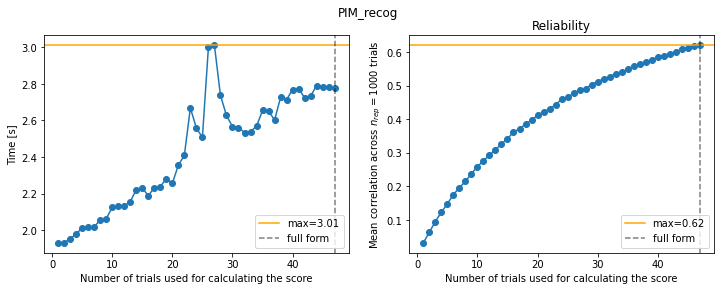

In [43]:
corr_array, trial_time, n_trials_list = None, None, None

# this is not sampled based on the see/unseen since we haven't seen any difference before
# test="PIM_recog"


# define the df
df_sort=None
df_sort = df_PIM_recog_concat[df_PIM_recog_concat["sender"]=="Recognize"].sort_values(by=["userID"])[["userID", "correct"]].copy()
df_sort.reset_index(inplace=True, drop=True)


# num of subjects
N = len(df_sort["userID"].unique())#len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_sort, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_sort, N, test, step=1, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_sort, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()
# 133 s which is (2.2 min) per 1 000

#### Scale by confidence

In [44]:
# ignore the pandas setting a copy warning to make it more readabe
# https://stackoverflow.com/questions/54197853/how-to-ignore-settingwithcopywarning-using-warnings-simplefilter
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# create a helper column to have -1 as incorrect and 1 as correct, that will preserve the confidence going the opposite
# direction for correct and incorrect trials (ie I'm more punished if I was sure and wrong)
df_PIM_recog_concat["correct_helper"] = df_PIM_recog_concat["correct"]*2-1
df_PIM_recog_concat["correct_helper"].ffill(inplace=True)

# get numerical mapping of confidence
# df_PIM_recog_concat["confidence_num"] = np.nan
df_PIM_recog_concat["confidence_num"] = df_PIM_recog_concat["response"].map({"very":3, "moderately":2, "not_at_all":1})


# df_PIM_recog_concat["correct_confidence_scaled"] = np.nan
# make it range from -3 to 3 the right way
df_PIM_recog_concat.loc[df_PIM_recog_concat["sender"]=="Confidence","correct_confidence_scaled"] = df_PIM_recog_concat.loc[df_PIM_recog_concat["sender"]=="Confidence","confidence_num"]*df_PIM_recog_concat.loc[df_PIM_recog_concat["sender"]=="Confidence","correct_helper"]
# move it to be 0 to 5
df_PIM_recog_concat.loc[df_PIM_recog_concat["correct_confidence_scaled"]<0,"correct_confidence_scaled"] +=1
df_PIM_recog_concat.loc[:,"correct_confidence_scaled"] += 3

df_PIM_recog_concat

,userID,observation,sender,correct,response,seen,correct_helper,confidence_num,correct_confidence_scaled
0,s_100,70ee3,Confidence,NaN,very,y,NaN,3.0,NaN
1,s_100,70ee3,Recognize,1.0,ArrowLeft,n,1.0,NaN,NaN
2,s_100,70ee3,Confidence,NaN,not_at_all,n,1.0,1.0,4.0
3,s_100,70ee3,Recognize,1.0,ArrowLeft,n,1.0,NaN,NaN
4,s_100,70ee3,Confidence,NaN,very,y,1.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...
29179,s_99,f67f8,Recognize,1.0,ArrowLeft,n,1.0,NaN,NaN
29180,s_99,f67f8,Confidence,NaN,very,n,1.0,3.0,6.0
29181,s_99,f67f8,Confidence,NaN,very,y,1.0,3.0,6.0
29182,s_99,f67f8,Recognize,1.0,ArrowLeft,n,1.0,NaN,NaN


Total number of trials is 96.
Going over (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47) trials per task, ie. 47 items
Time per 1 trials: 1.91 s which is 0.03 min.
Time per 2 trials: 1.93 s which is 0.03 min.
Time per 3 trials: 1.95 s which is 0.03 min.
Time per 4 trials: 2.02 s which is 0.03 min.
Time per 5 trials: 1.98 s which is 0.03 min.
Time per 6 trials: 2.03 s which is 0.03 min.
Time per 7 trials: 2.06 s which is 0.03 min.
Time per 8 trials: 2.04 s which is 0.03 min.
Time per 9 trials: 2.07 s which is 0.03 min.
Time per 10 trials: 2.07 s which is 0.03 min.
Time per 11 trials: 2.19 s which is 0.04 min.
Time per 12 trials: 2.15 s which is 0.04 min.
Time per 13 trials: 2.15 s which is 0.04 min.
Time per 14 trials: 2.15 s which is 0.04 min.
Time per 15 trials: 2.15 s which is 0.04 min.
Time per 16 trials: 2.16 s which is 0.04 min.
Time per 17 trials: 2.

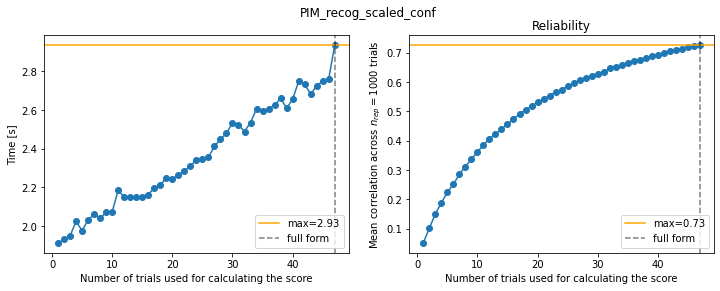

In [45]:
corr_array, trial_time, n_trials_list = None, None, None

# this is not sampled based on the see/unseen since we haven't seen any difference before
test="PIM_recog_scaled_conf"
# save the name so that we have easier job later
test_names.append(test)

# define the df
df_sort=None
df_sort = df_PIM_recog_concat[df_PIM_recog_concat["sender"]=="Confidence"].sort_values(by=["userID"])[["userID", "correct_confidence_scaled"]].copy()
df_sort.reset_index(inplace=True, drop=True)


# num of subjects
N = len(df_sort["userID"].unique())#len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_sort, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_sort, N, test, step=1, 
                                                                             cols=["userID", "correct_confidence_scaled"],
                                                                             measure='correct_confidence_scaled',
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_sort, n_trials_list, save_merge=True, path=path_curve_fit, 
                               measure="correct_confidence_scaled", cols=["userID", "correct_confidence_scaled"],
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()
# 133 s which is (2.2 min) per 1 000

## PGNG
[top](#top)

---
NOTE
--
as of 25.1.2023 we also use `prac` block in PCTT calculations.

In [46]:
# define manually num of trials
n_trials_per_form = 142#-26 # dropping the first level
num_forms = 2

test="PGNG"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PGNG-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PGNG-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_PGNG_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'PGNG-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'PGNG-cleaned_data_rep.csv')),
])

# take only the full data
df_PGNG_concat = df_PGNG_concat[df_PGNG_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# # drop the first block
# df_PGNG_concat = df_PGNG_concat[df_PGNG_concat["block"]!=1]

# should be empty -- test if people don't have more than 1 entry
print(df_PGNG_concat.userID.value_counts()[df_PGNG_concat.userID.value_counts()>2*n_trials_per_form])#.keys()

Running 2 replicate studies with total 152 participants.
Series([], Name: userID, dtype: int64)


### Run PGNG score 

Total number of trials is 284.
Going over (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140) trials per task, ie. 28 items
Time per 5 trials: 2.16 s which is 0.04 min.
Time per 10 trials: 2.21 s which is 0.04 min.
Time per 15 trials: 2.29 s which is 0.04 min.
Time per 20 trials: 2.36 s which is 0.04 min.
Time per 25 trials: 2.46 s which is 0.04 min.
Time per 30 trials: 2.61 s which is 0.04 min.
Time per 35 trials: 2.68 s which is 0.04 min.
Time per 40 trials: 2.74 s which is 0.05 min.
Time per 45 trials: 2.86 s which is 0.05 min.
Time per 50 trials: 2.88 s which is 0.05 min.
Time per 55 trials: 3.05 s which is 0.05 min.
Time per 60 trials: 3.14 s which is 0.05 min.
Time per 65 trials: 3.20 s which is 0.05 min.
Time per 70 trials: 3.32 s which is 0.06 min.
Time per 75 trials: 3.42 s which is 0.06 min.
Time per 80 trials: 3.51 s which is 0.06 min.
Time per 85 trials: 3.51 s which is 0.06 min.
Time per 90 trials: 3.65 s

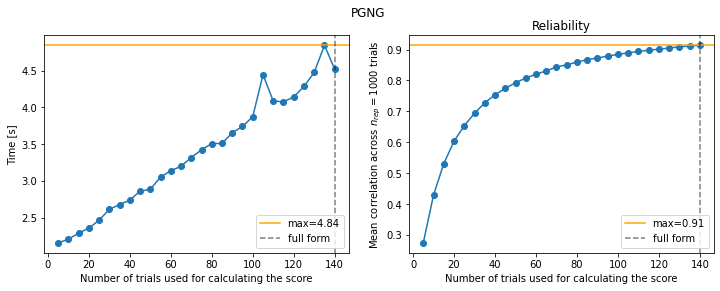

In [47]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_PGNG_concat, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_PGNG_concat, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_PGNG_concat, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()
# 75 s which is (1.3 min) per 1 000

### Run PGNG PCIT

Inhibitory block 2
Test: PGNG_PCIT_l2
Total number of trials is 24.
Going over (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11) trials per task, ie. 11 items
Time per 1 trials: 2.17 s which is 0.04 min.
Time per 2 trials: 2.27 s which is 0.04 min.
Time per 3 trials: 2.19 s which is 0.04 min.
Time per 4 trials: 2.23 s which is 0.04 min.
Time per 5 trials: 2.29 s which is 0.04 min.
Time per 6 trials: 2.58 s which is 0.04 min.
Time per 7 trials: 2.57 s which is 0.04 min.
Time per 8 trials: 2.29 s which is 0.04 min.
Time per 9 trials: 2.33 s which is 0.04 min.
Time per 10 trials: 2.34 s which is 0.04 min.
Time per 11 trials: 2.33 s which is 0.04 min.


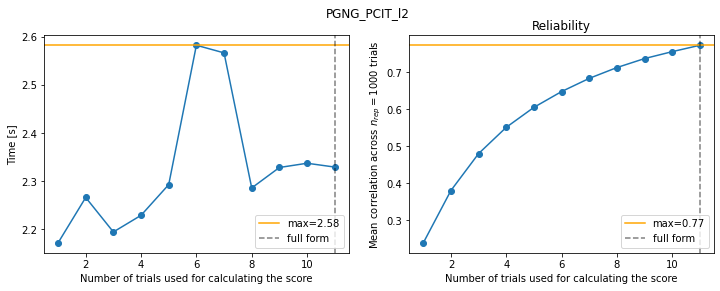

Inhibitory block 4
Test: PGNG_PCIT_l3
Total number of trials is 26.
Going over (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12) trials per task, ie. 12 items
Time per 1 trials: 2.20 s which is 0.04 min.
Time per 2 trials: 2.43 s which is 0.04 min.
Time per 3 trials: 2.50 s which is 0.04 min.
Time per 4 trials: 2.32 s which is 0.04 min.
Time per 5 trials: 2.24 s which is 0.04 min.
Time per 6 trials: 2.26 s which is 0.04 min.
Time per 7 trials: 2.26 s which is 0.04 min.
Time per 8 trials: 2.29 s which is 0.04 min.
Time per 9 trials: 2.36 s which is 0.04 min.
Time per 10 trials: 2.42 s which is 0.04 min.
Time per 11 trials: 2.34 s which is 0.04 min.
Time per 12 trials: 2.42 s which is 0.04 min.


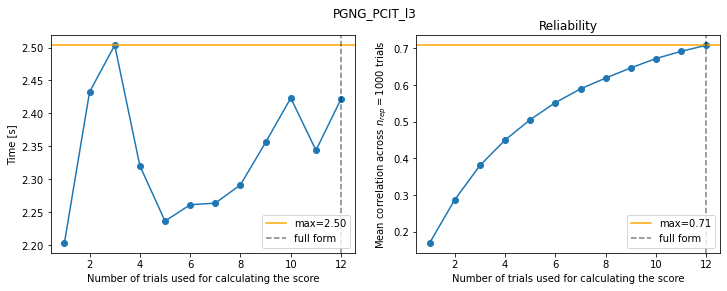

Process took: 54.21 s which is 0.90 min.


In [48]:
corr_array, trial_time, n_trials_list = None, None, None
i,j,k = None, None, None


test=["PGNG_PCIT_l2","PGNG_PCIT_l3"]

# inhibitory
inhib_blocks = [2,4]
n_trials_inhib = num_forms*np.array([12,13])


# define the df
df_inhib = df_PGNG_concat[(df_PGNG_concat["inhibitory"].astype(bool))&(df_PGNG_concat["block"].isin([2,4]))].sort_values(by=["userID", "block"])[["userID", "block", "correct"]].copy()


# num of subjects
N = len(df_inhib.userID.unique())
# how many samples we want to correlate
n_repeats = 10**3
# define step
step=1


# define corr array
PGNG_PCIT_concat_list_corr = []

    
# start the timer
start = time.time()

# I have to do a loop over the two blocks since they do not have the same number of trials. Otherwise it could
# be done using two series -- num_trials and correct_inhib and just divide them. It's slow but not that slow
for k, block in enumerate(inhib_blocks):
    print(f"Inhibitory block {block}")
    df_sort=None
    corr_array=None
    
    # do statistics - define the dataframe
    df_measures = pd.DataFrame()
    
    # save the name so that we have easier job later
    test_names.append(test[k])
    print(f"Test: {test[k]}")

    # select trials per the given tasks, sort it by userID to be sure we take the same trials
    df_sort = df_inhib.loc[df_inhib["block"]==block, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)
    
    # define number of trials
    n_trials_list = np.arange(step, (total_n_trials+step)//2, step)
    print(f"Going over {*n_trials_list,} trials per task, ie. {len(n_trials_list)} items")
    
    # define the array
    corr_array = np.zeros((len(n_trials_list),n_repeats))
    trial_time = np.zeros(len(n_trials_list))
    
    
    for j, n_trials in enumerate(n_trials_list):

        start_trial = time.time()

        # check that it's possible
        assert n_trials <= n_trials_inhib[k]//2
        # check if all people have the same number of trials
        assert (df_sort["userID"].value_counts()==n_trials_inhib[k]).all()


        # go over iterations
        for i in range(n_repeats):
            df_PGNG_first = None
            df_PGNG_second = None

            # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
            df_PGNG_first, df_PGNG_second = split_dataframes_faster_chunks(df_sort, total_n_trials, n_trials, N)

            # calculate correlation
            corr_array[j,i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                                        (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
                                                               method='pearson')  
            
        ## add statistics, again, mean_p = mean

        # randomly sample number of trials per subject
        df_tmp = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).copy()
        # create statistics
        df_measures = df_measures.append(pd.DataFrame({
            "n_trials": [n_trials],
            "mean": df_tmp.mean(),
            "sd": df_tmp.std(),
            "var": df_tmp.var(),
            "sem": df_tmp.std() / np.sqrt(n_trials),
            "mean_p": df_tmp.mean(),
            "var_p": df_tmp.var(),
        }))        
        
        # save time
        trial_time[j] = time.time()-start_trial
        print(f"Time per {n_trials} trials: {trial_time[j]:.2f} s which is {trial_time[j]/60:.2f} min.")
        
    # save the array for each level
    PGNG_PCIT_concat_list_corr.append(corr_array)
    
    # save
    pd.DataFrame(corr_array.T, columns=[f"n_trials_{x}" for x in n_trials_list]
                ).to_csv(os.path.join(path_curve_fit, f"{test[k]}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}.csv"), index=False)
    
    # save
    pd.DataFrame(corr_array.T, columns=[f"n_trials_{x}" for x in n_trials_list]
                ).to_csv(os.path.join(path_curve_fit, f"{test[k]}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}.csv"), index=False)

    df_measures.insert(1, "reliability", np.nanmean(corr_array, axis=1))
    df_measures.to_csv(os.path.join(path_curve_fit, 
                                    f"{test[k]}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"),
                       index=False)

    
    # plot
    fig, axs = plt.subplots(1,2, figsize=(12,4))

    # plot time
    plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
    axs[0].set_ylabel('Time [s]')

    # plot reliability
    plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
    axs[1].set_title('Reliability')
    plt.suptitle(test[k])
    plt.show()

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 1.03 s per 100
# 60 s (1 min) per 10 000

####  both levels together
[top](#top)



Test: PGNG_PCIT
Total number of trials is 50.
Going over (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24) trials per task, ie. 24 items
Time per 1 trials: 2.49 s which is 0.04 min.
Time per 2 trials: 2.50 s which is 0.04 min.
Time per 3 trials: 2.25 s which is 0.04 min.
Time per 4 trials: 2.27 s which is 0.04 min.
Time per 5 trials: 2.35 s which is 0.04 min.
Time per 6 trials: 2.32 s which is 0.04 min.
Time per 7 trials: 2.31 s which is 0.04 min.
Time per 8 trials: 2.34 s which is 0.04 min.
Time per 9 trials: 2.63 s which is 0.04 min.
Time per 10 trials: 2.68 s which is 0.04 min.
Time per 11 trials: 2.45 s which is 0.04 min.
Time per 12 trials: 2.40 s which is 0.04 min.
Time per 13 trials: 2.39 s which is 0.04 min.
Time per 14 trials: 2.45 s which is 0.04 min.
Time per 15 trials: 2.43 s which is 0.04 min.
Time per 16 trials: 2.48 s which is 0.04 min.
Time per 17 trials: 2.75 s which is 0.05 min.
Time per 18 trials: 2.84 s which is 0.05 min.
Time p

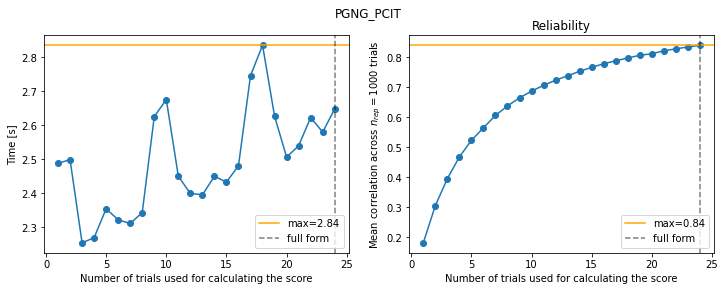

Process took: 60.15 s which is 1.00 min.


In [49]:
corr_array, trial_time, n_trials_list = None, None, None
i,j = None, None


test="PGNG_PCIT"

# inhibitory
inhib_blocks = [2,4]

# define the df
df_inhib = df_PGNG_concat[(df_PGNG_concat["inhibitory"].astype(bool))&(df_PGNG_concat["block"].isin([2,4]))].sort_values(by=["userID", "block"])[["userID", "correct"]].copy()


# num of subjects
N = len(df_inhib.userID.unique())
# how many samples we want to correlate
n_repeats = 10**3
# define step
step=1

    
# start the timer
start = time.time()

    
# do statistics - define the dataframe
df_measures = pd.DataFrame()

# save the name so that we have easier job later
test_names.append(test)
print(f"Test: {test}")

# max number of trials
total_n_trials = check_df_get_numbers(df_inhib, N)

# define number of trials
n_trials_list = np.arange(step, (total_n_trials+step)//2, step)
print(f"Going over {*n_trials_list,} trials per task, ie. {len(n_trials_list)} items")

# define the array
corr_array = np.zeros((len(n_trials_list),n_repeats))
trial_time = np.zeros(len(n_trials_list))


for j, n_trials in enumerate(n_trials_list):

    start_trial = time.time()

    # check that it's possible
    assert n_trials <= total_n_trials//2
    # check if all people have the same number of trials
    assert df_inhib["userID"].value_counts().unique().size == 1


    # go over iterations
    for i in range(n_repeats):
        df_PGNG_first = None
        df_PGNG_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_PGNG_first, df_PGNG_second = split_dataframes_faster_chunks(df_inhib, total_n_trials, n_trials, N)

        # calculate correlation
        corr_array[j,i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                          (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
                            method='pearson')

    ## add statistics, again, mean_p = mean

    # randomly sample number of trials per subject
    df_tmp = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).copy()
    # create statistics
    df_measures = df_measures.append(pd.DataFrame({
        "n_trials": [n_trials],
        "mean": df_tmp.mean(),
        "sd": df_tmp.std(),
        "var": df_tmp.var(),
        "sem": df_tmp.std() / np.sqrt(n_trials),
        "mean_p": df_tmp.mean(),
        "var_p": df_tmp.var(),
    }))        

    # save time
    trial_time[j] = time.time()-start_trial
    print(f"Time per {n_trials} trials: {trial_time[j]:.2f} s which is {trial_time[j]/60:.2f} min.")


# save
pd.DataFrame(corr_array.T, columns=[f"n_trials_{x}" for x in n_trials_list]
            ).to_csv(os.path.join(path_curve_fit, f"{test}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}.csv"), index=False)

df_measures.insert(1, "reliability", np.nanmean(corr_array, axis=1))
df_measures.to_csv(os.path.join(path_curve_fit, 
                                f"{test}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"),
                   index=False)


# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 1.03 s per 100
# 63 s (1 min) per 10 000

### Run PGNG PCTT
[top](#top)

##### for 3 blocks without prac (level 0)

In [50]:
# corr_array, trial_time, n_trials_list = None, None, None
# i,j,k = None, None, None


# test=["PGNG_PCTT_l1","PGNG_PCTT_l2","PGNG_PCTT_l3"]

# # NOTICE the swapped order of the blocks, it is based on the levels we want to have. See note above
# n_trials_all = num_forms*np.array([26, 45, 45])
# blocks = [3, 2, 4] 


# # define the df, select all the non-inhibitory trials
# df_non_inhib = df_PGNG_concat[~df_PGNG_concat["inhibitory"].astype(bool)].sort_values(by=["userID", "block"])[["userID", "block", "correct"]].copy()

# # num of subjects
# N = len(df_non_inhib.userID.unique())
# # check that the number of people is the same
# assert N == len(df_PGNG_concat.userID.unique())
# # how many samples we want to correlate
# n_repeats = 10**3
# # define step
# step=1


# # define corr array
# PGNG_PCTT_concat_list_corr = []

    
# # start the timer
# start = time.time()

# # I have to do a loop over the three blocks since they do not have the same number of trials. Otherwise it could
# # be done using two series -- num_trials and correct_inhib and just divide them. It's slow but not that slow
# for k, block in enumerate(blocks):
#     print(f"Block {block}")
#     df_sort=None
#     corr_array=None
    
#     # do statistics - define the dataframe
#     df_measures = pd.DataFrame()
    
#     # save the name so that we have easier job later
#     test_names.append(test[k])
#     print(f"Test: {test[k]}")

#     # select trials per the given tasks, sort it by userID to be sure we take the same trials
#     df_sort = df_non_inhib.loc[df_non_inhib["block"]==block, ["userID", "correct"]].copy()

#     # max number of trials
#     total_n_trials = check_df_get_numbers(df_sort, N)
    
#     # define number of trials
#     n_trials_list = np.arange(step, (total_n_trials+step)//2, step)
#     print(f"Going over {*n_trials_list,} trials per task, ie. {len(n_trials_list)} items")
    
#     # define the array
#     corr_array = np.zeros((len(n_trials_list),n_repeats))
#     trial_time = np.zeros(len(n_trials_list))
    
    
#     for j, n_trials in enumerate(n_trials_list):

#         start_trial = time.time()

#         # check that it's possible
#         assert n_trials <= n_trials_all[k]//2
#         # check if all people have the same number of trials
# #         assert (df_sort["userID"].value_counts()==n_trials_all[k]).all()
#         assert df_sort["userID"].value_counts().unique().size==1


#         # go over iterations
#         for i in range(n_repeats):
#             df_PGNG_first = None
#             df_PGNG_second = None

#             # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
#             df_PGNG_first, df_PGNG_second = split_dataframes_faster_chunks(df_sort, total_n_trials, n_trials, N)

#             # calculate correlation
#             corr_array[j,i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
#                               (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
#                                                            method='pearson')

#         ## add statistics, again, mean_p = mean

#         # randomly sample number of trials per subject
#         df_tmp = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).copy()
#         # create statistics
#         df_measures = df_measures.append(pd.DataFrame({
#             "n_trials": [n_trials],
#             "mean": df_tmp.mean(),
#             "sd": df_tmp.std(),
#             "var": df_tmp.var(),
#     #         "sum_subj_sd": df_tmp.groupby(["userID"]).std().correct.sum(),
#             "sem": df_tmp.std() / np.sqrt(n_trials),
#             "mean_p": df_tmp.mean(),
#             "var_p": df_tmp.var(),
#             # "sem_inverse": 1 / (df_tmp["correct"].std() / np.sqrt(n_trials)),
#             # "sem_neg": -(df_tmp["correct"].std() / np.sqrt(n_trials)),
#             # "1-sem": 1 - (df_tmp["correct"].std() / np.sqrt(n_trials)),
#         }))
        
#         # save time
#         trial_time[j] = time.time()-start_trial
#         print(f"Time per {n_trials} trials: {trial_time[j]:.2f} s which is {trial_time[j]/60:.2f} min.")
        
#     # save the array for each level
#     PGNG_PCTT_concat_list_corr.append(corr_array)
    
#     # save
#     pd.DataFrame(corr_array.T, columns=[f"n_trials_{x}" for x in n_trials_list]
#                 ).to_csv(os.path.join(path_curve_fit, f"{test[k]}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}.csv"), index=False)

# #     pd.DataFrame({"reliability":corr_array.mean(axis=1), 
# #                   "n_trials":n_trials_list}).to_csv(os.path.join(path_curve_fit, 
# #                                                                  f"{test[k]}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"), index=False)
#     df_measures.insert(1, "reliability", np.nanmean(corr_array, axis=1))
#     df_measures.to_csv(os.path.join(path_curve_fit, 
#                                     f"{test[k]}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"),
#                        index=False)

    
#     # plot
#     fig, axs = plt.subplots(1,2, figsize=(12,4))

#     # plot time
#     plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
#     axs[0].set_ylabel('Time [s]')

#     # plot reliability
#     plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
#     axs[1].set_title('Reliability')
#     plt.suptitle(test[k])
#     plt.show()

# end = time.time()
# print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# # 247 s (4.1 min) per 10 000

Block 1
Test: PGNG_PCTT_l0
Total number of trials is 52.
Going over (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25) trials per task, ie. 25 items
Time per 1 trials: 2.48 s which is 0.04 min.
Time per 2 trials: 2.50 s which is 0.04 min.
Time per 3 trials: 2.31 s which is 0.04 min.
Time per 4 trials: 2.28 s which is 0.04 min.
Time per 5 trials: 2.29 s which is 0.04 min.
Time per 6 trials: 2.41 s which is 0.04 min.
Time per 7 trials: 2.29 s which is 0.04 min.
Time per 8 trials: 2.32 s which is 0.04 min.
Time per 9 trials: 2.45 s which is 0.04 min.
Time per 10 trials: 2.68 s which is 0.04 min.
Time per 11 trials: 2.62 s which is 0.04 min.
Time per 12 trials: 2.42 s which is 0.04 min.
Time per 13 trials: 2.41 s which is 0.04 min.
Time per 14 trials: 2.44 s which is 0.04 min.
Time per 15 trials: 2.45 s which is 0.04 min.
Time per 16 trials: 2.48 s which is 0.04 min.
Time per 17 trials: 2.81 s which is 0.05 min.
Time per 18 trials: 2.84 s which is 0

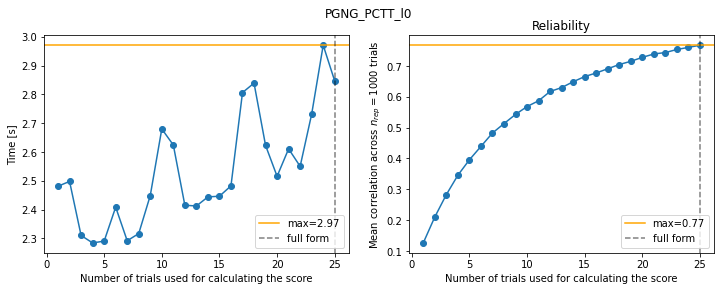

Block 3
Test: PGNG_PCTT_l1
Total number of trials is 52.
Going over (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25) trials per task, ie. 25 items
Time per 1 trials: 2.17 s which is 0.04 min.
Time per 2 trials: 2.16 s which is 0.04 min.
Time per 3 trials: 2.23 s which is 0.04 min.
Time per 4 trials: 2.22 s which is 0.04 min.
Time per 5 trials: 2.49 s which is 0.04 min.
Time per 6 trials: 2.58 s which is 0.04 min.
Time per 7 trials: 2.48 s which is 0.04 min.
Time per 8 trials: 2.30 s which is 0.04 min.
Time per 9 trials: 2.36 s which is 0.04 min.
Time per 10 trials: 2.47 s which is 0.04 min.
Time per 11 trials: 2.54 s which is 0.04 min.
Time per 12 trials: 2.70 s which is 0.04 min.
Time per 13 trials: 2.73 s which is 0.05 min.
Time per 14 trials: 2.58 s which is 0.04 min.
Time per 15 trials: 2.41 s which is 0.04 min.
Time per 16 trials: 2.44 s which is 0.04 min.
Time per 17 trials: 2.80 s which is 0.05 min.
Time per 18 trials: 3.04 s which is 0

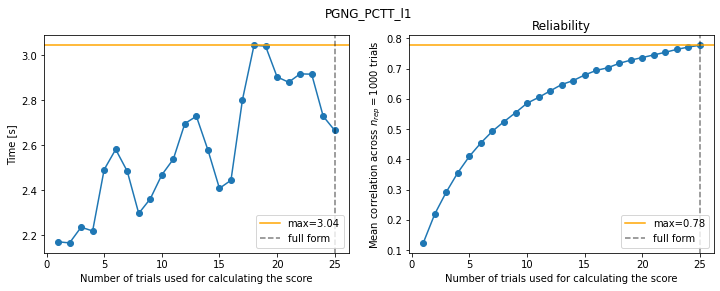

Block 2
Test: PGNG_PCTT_l2
Total number of trials is 66.
Going over (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32) trials per task, ie. 32 items
Time per 1 trials: 2.36 s which is 0.04 min.
Time per 2 trials: 2.48 s which is 0.04 min.
Time per 3 trials: 2.62 s which is 0.04 min.
Time per 4 trials: 2.63 s which is 0.04 min.
Time per 5 trials: 2.66 s which is 0.04 min.
Time per 6 trials: 2.65 s which is 0.04 min.
Time per 7 trials: 2.69 s which is 0.04 min.
Time per 8 trials: 2.68 s which is 0.04 min.
Time per 9 trials: 2.75 s which is 0.05 min.
Time per 10 trials: 2.82 s which is 0.05 min.
Time per 11 trials: 2.67 s which is 0.04 min.
Time per 12 trials: 2.54 s which is 0.04 min.
Time per 13 trials: 2.47 s which is 0.04 min.
Time per 14 trials: 2.38 s which is 0.04 min.
Time per 15 trials: 2.76 s which is 0.05 min.
Time per 16 trials: 2.82 s which is 0.05 min.
Time per 17 trials: 2.83 s which is 0.05 min.
Time per 

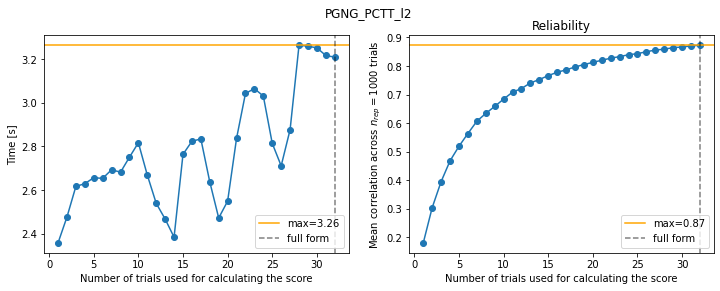

Block 4
Test: PGNG_PCTT_l3
Total number of trials is 64.
Going over (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31) trials per task, ie. 31 items
Time per 1 trials: 2.23 s which is 0.04 min.
Time per 2 trials: 2.27 s which is 0.04 min.
Time per 3 trials: 2.25 s which is 0.04 min.
Time per 4 trials: 2.55 s which is 0.04 min.
Time per 5 trials: 2.64 s which is 0.04 min.
Time per 6 trials: 2.60 s which is 0.04 min.
Time per 7 trials: 2.54 s which is 0.04 min.
Time per 8 trials: 2.38 s which is 0.04 min.
Time per 9 trials: 2.40 s which is 0.04 min.
Time per 10 trials: 2.49 s which is 0.04 min.
Time per 11 trials: 2.72 s which is 0.05 min.
Time per 12 trials: 2.72 s which is 0.05 min.
Time per 13 trials: 2.84 s which is 0.05 min.
Time per 14 trials: 2.92 s which is 0.05 min.
Time per 15 trials: 2.89 s which is 0.05 min.
Time per 16 trials: 2.90 s which is 0.05 min.
Time per 17 trials: 2.90 s which is 0.05 min.
Time per 18 t

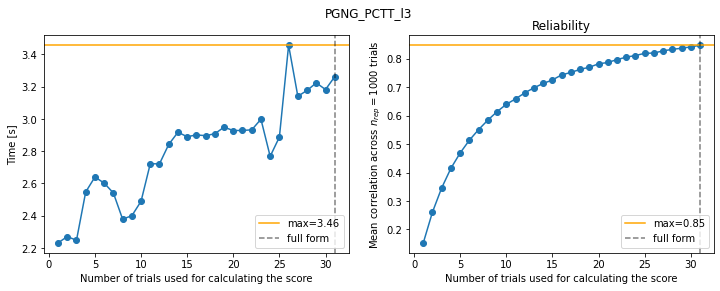

Process took: 305.42 s which is 5.09 min.


In [51]:
corr_array, trial_time, n_trials_list = None, None, None
i,j,k = None, None, None


test=["PGNG_PCTT_l0", "PGNG_PCTT_l1","PGNG_PCTT_l2","PGNG_PCTT_l3"]

# NOTICE the swapped order of the blocks, it is based on the levels we want to have. See note above
n_trials_all = num_forms*np.array([26,26, 45, 45])
blocks = [1, 3, 2, 4] 


# define the df, select all the non-inhibitory trials
df_non_inhib = df_PGNG_concat[~df_PGNG_concat["inhibitory"].astype(bool)].sort_values(by=["userID", "block"])[["userID", "block", "correct"]].copy()

# num of subjects
N = len(df_non_inhib.userID.unique())
# check that the number of people is the same
assert N == len(df_PGNG_concat.userID.unique())
# how many samples we want to correlate
n_repeats = 10**3
# define step
step=1


# define corr array
PGNG_PCTT_concat_list_corr = []

    
# start the timer
start = time.time()

# I have to do a loop over the three blocks since they do not have the same number of trials. Otherwise it could
# be done using two series -- num_trials and correct_inhib and just divide them. It's slow but not that slow
for k, block in enumerate(blocks):
    print(f"Block {block}")
    df_sort=None
    corr_array=None
    
    # do statistics - define the dataframe
    df_measures = pd.DataFrame()
    
    # save the name so that we have easier job later
    test_names.append(test[k])
    print(f"Test: {test[k]}")

    # select trials per the given tasks, sort it by userID to be sure we take the same trials
    df_sort = df_non_inhib.loc[df_non_inhib["block"]==block, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)
    
    # define number of trials
    n_trials_list = np.arange(step, (total_n_trials+step)//2, step)
    print(f"Going over {*n_trials_list,} trials per task, ie. {len(n_trials_list)} items")
    
    # define the array
    corr_array = np.zeros((len(n_trials_list),n_repeats))
    trial_time = np.zeros(len(n_trials_list))
    
    
    for j, n_trials in enumerate(n_trials_list):

        start_trial = time.time()

        # check that it's possible
        assert n_trials <= n_trials_all[k]//2
        # check if all people have the same number of trials
#         assert (df_sort["userID"].value_counts()==n_trials_all[k]).all()
        assert df_sort["userID"].value_counts().unique().size==1


        # go over iterations
        for i in range(n_repeats):
            df_PGNG_first = None
            df_PGNG_second = None

            # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
            df_PGNG_first, df_PGNG_second = split_dataframes_faster_chunks(df_sort, total_n_trials, n_trials, N)

            # calculate correlation
            corr_array[j,i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                              (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
                                                           method='pearson')

        ## add statistics, again, mean_p = mean

        # randomly sample number of trials per subject
        df_tmp = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).copy()
        # create statistics
        df_measures = df_measures.append(pd.DataFrame({
            "n_trials": [n_trials],
            "mean": df_tmp.mean(),
            "sd": df_tmp.std(),
            "var": df_tmp.var(),
    #         "sum_subj_sd": df_tmp.groupby(["userID"]).std().correct.sum(),
            "sem": df_tmp.std() / np.sqrt(n_trials),
            "mean_p": df_tmp.mean(),
            "var_p": df_tmp.var(),
            # "sem_inverse": 1 / (df_tmp["correct"].std() / np.sqrt(n_trials)),
            # "sem_neg": -(df_tmp["correct"].std() / np.sqrt(n_trials)),
            # "1-sem": 1 - (df_tmp["correct"].std() / np.sqrt(n_trials)),
        }))
        
        # save time
        trial_time[j] = time.time()-start_trial
        print(f"Time per {n_trials} trials: {trial_time[j]:.2f} s which is {trial_time[j]/60:.2f} min.")
        
    # save the array for each level
    PGNG_PCTT_concat_list_corr.append(corr_array)
    
    # save
    pd.DataFrame(corr_array.T, columns=[f"n_trials_{x}" for x in n_trials_list]
                ).to_csv(os.path.join(path_curve_fit, f"{test[k]}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}.csv"), index=False)

#     pd.DataFrame({"reliability":corr_array.mean(axis=1), 
#                   "n_trials":n_trials_list}).to_csv(os.path.join(path_curve_fit, 
#                                                                  f"{test[k]}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"), index=False)
    df_measures.insert(1, "reliability", np.nanmean(corr_array, axis=1))
    df_measures.to_csv(os.path.join(path_curve_fit, 
                                    f"{test[k]}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"),
                       index=False)

    
    # plot
    fig, axs = plt.subplots(1,2, figsize=(12,4))

    # plot time
    plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
    axs[0].set_ylabel('Time [s]')

    # plot reliability
    plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
    axs[1].set_title('Reliability')
    plt.suptitle(test[k])
    plt.show()

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 247 s (4.1 min) per 10 000

#### all levels together
[top](#top)

Test: PGNG_PCTT
Total number of trials is 234.
Going over (2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116) trials per task, ie. 58 items
Time per 2 trials: 2.83 s which is 0.05 min.
Time per 4 trials: 2.89 s which is 0.05 min.
Time per 6 trials: 2.82 s which is 0.05 min.
Time per 8 trials: 2.90 s which is 0.05 min.
Time per 10 trials: 2.96 s which is 0.05 min.
Time per 12 trials: 2.99 s which is 0.05 min.
Time per 14 trials: 3.03 s which is 0.05 min.
Time per 16 trials: 3.10 s which is 0.05 min.
Time per 18 trials: 3.11 s which is 0.05 min.
Time per 20 trials: 3.15 s which is 0.05 min.
Time per 22 trials: 3.37 s which is 0.06 min.
Time per 24 trials: 3.28 s which is 0.05 min.
Time per 26 trials: 3.50 s which is 0.06 min.
Time per 28 trials: 3.57 s which is 0.06 min.
Time per 30 trials: 3.59 s which i

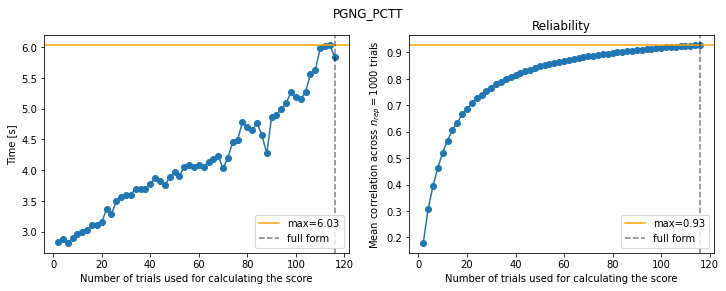

Process took: 242.79 s which is 4.05 min.


In [52]:
corr_array, trial_time, n_trials_list = None, None, None
i,j = None, None


test="PGNG_PCTT"

# NOTICE the swapped order of the blocks, it is based on the levels we want to have. See note above
# n_trials_all = num_forms*np.array([26,26, 45, 45])
blocks = [1, 3, 2, 4] 


# define the df, select all the non-inhibitory trials
df_non_inhib = df_PGNG_concat[~df_PGNG_concat["inhibitory"].astype(bool)].sort_values(by=["userID", "block"])[["userID", "block", "correct"]].copy()

# num of subjects
N = len(df_non_inhib.userID.unique())
# check that the number of people is the same
assert N == len(df_PGNG_concat.userID.unique())
# how many samples we want to correlate
n_repeats = 10**3
# define step
step=2

    
# start the timer
start = time.time()


# do statistics - define the dataframe
df_measures = pd.DataFrame()

# save the name so that we have easier job later
test_names.append(test)
print(f"Test: {test}")

# max number of trials
total_n_trials = check_df_get_numbers(df_non_inhib, N)

# define number of trials
n_trials_list = np.arange(step, (total_n_trials+step)//2, step)
print(f"Going over {*n_trials_list,} trials per task, ie. {len(n_trials_list)} items")

# define the array
corr_array = np.zeros((len(n_trials_list),n_repeats))
trial_time = np.zeros(len(n_trials_list))


for j, n_trials in enumerate(n_trials_list):

    start_trial = time.time()

    # check that it's possible
    assert n_trials <= total_n_trials//2
    # check if all people have the same number of trials
    assert df_non_inhib["userID"].value_counts().unique().size==1


    # go over iterations
    for i in range(n_repeats):
        df_PGNG_first = None
        df_PGNG_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_PGNG_first, df_PGNG_second = split_dataframes_faster_chunks(df_non_inhib, total_n_trials, n_trials, N)

        # calculate correlation
        corr_array[j,i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                          (df_PGNG_second.groupby('userID').correct.sum()/n_trials),
                            method='pearson')

    ## add statistics, again, mean_p = mean

    # randomly sample number of trials per subject
    df_tmp = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).copy()
    # create statistics
    df_measures = df_measures.append(pd.DataFrame({
        "n_trials": [n_trials],
        "mean": df_tmp.mean(),
        "sd": df_tmp.std(),
        "var": df_tmp.var(),
#         "sum_subj_sd": df_tmp.groupby(["userID"]).std().correct.sum(),
        "sem": df_tmp.std() / np.sqrt(n_trials),
        "mean_p": df_tmp.mean(),
        "var_p": df_tmp.var(),
        # "sem_inverse": 1 / (df_tmp["correct"].std() / np.sqrt(n_trials)),
        # "sem_neg": -(df_tmp["correct"].std() / np.sqrt(n_trials)),
        # "1-sem": 1 - (df_tmp["correct"].std() / np.sqrt(n_trials)),
    }))

    # save time
    trial_time[j] = time.time()-start_trial
    print(f"Time per {n_trials} trials: {trial_time[j]:.2f} s which is {trial_time[j]/60:.2f} min.")


# save
pd.DataFrame(corr_array.T, columns=[f"n_trials_{x}" for x in n_trials_list]
            ).to_csv(os.path.join(path_curve_fit, f"{test}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}.csv"), index=False)

#     pd.DataFrame({"reliability":corr_array.mean(axis=1), 
#                   "n_trials":n_trials_list}).to_csv(os.path.join(path_curve_fit, 
#                                                                  f"{test}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"), index=False)
df_measures.insert(1, "reliability", np.nanmean(corr_array, axis=1))
df_measures.to_csv(os.path.join(path_curve_fit, 
                                f"{test}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"),
                   index=False)


# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 240 s (4 min) per 10 000

## RISE
[top](#top)

#### Run both days

There is a problem that the second day is extremely unreliable and also has more data points and was run differently.

In [53]:
# define manually num of trials
n_trials_per_form = 36
num_forms = 2

test="RISE_concat"
# save the name so that we have easier job later
# test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "RISE-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "RISE-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies (in total {num_forms}) with total {len(shared_participants)} participants.")

# load and concat the datasets
df_RISE_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'RISE-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'RISE-cleaned_data_rep.csv')),
])

# take only the full data
df_RISE_concat = df_RISE_concat[df_RISE_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_RISE_concat.userID.value_counts()[df_RISE_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

# rename cols to take the correct answer
df_RISE_concat.rename(columns={"correct":"for_sure_wrong_correct", "my_correct":"correct"}, inplace=True)

Running 2 replicate studies (in total 2) with total 109 participants.
s_185    106
s_89     106
s_155    106
s_36     106
s_111    106
        ... 
s_170    106
s_197    106
s_81     106
s_162    106
s_131    106
Name: userID, Length: 109, dtype: int64


Total number of trials is 106.
Going over (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52) trials per task, ie. 52 items
Time per 1 trials: 2.30 s which is 0.04 min.
Time per 2 trials: 2.27 s which is 0.04 min.
Time per 3 trials: 2.29 s which is 0.04 min.
Time per 4 trials: 2.26 s which is 0.04 min.
Time per 5 trials: 2.24 s which is 0.04 min.
Time per 6 trials: 2.27 s which is 0.04 min.
Time per 7 trials: 2.26 s which is 0.04 min.
Time per 8 trials: 2.27 s which is 0.04 min.
Time per 9 trials: 2.28 s which is 0.04 min.
Time per 10 trials: 2.27 s which is 0.04 min.
Time per 11 trials: 2.29 s which is 0.04 min.
Time per 12 trials: 2.35 s which is 0.04 min.
Time per 13 trials: 2.35 s which is 0.04 min.
Time per 14 trials: 2.36 s which is 0.04 min.
Time per 15 trials: 2.36 s which is 0.04 min.
Time per 16 trials: 2.38 s which is 0.04 min.
T

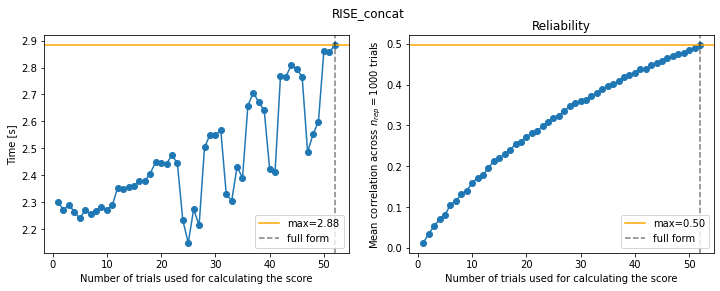

In [54]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_RISE_concat, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_RISE_concat, N, test, step=1, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_RISE_concat, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()
# 40 s which is (0.7 min) per 1 000

#### Run only the first day
As it was done originally

In [55]:
# define manually num of trials
n_trials_per_form = 36
num_forms = 1

test="RISE"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "RISE-cleaned_data.csv"), usecols=['userID']).userID)#&\
#     set(pd.read_csv(os.path.join(csv_clean_data_path, "RISE-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies (in total {num_forms}) with total {len(shared_participants)} participants.")

# load and concat the datasets
df_RISE_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'RISE-cleaned_data.csv')),
#     pd.read_csv(os.path.join(csv_clean_data_path, 'RISE-cleaned_data_rep.csv')),
])

# take only the full data
df_RISE_concat = df_RISE_concat[df_RISE_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_RISE_concat.userID.value_counts()[df_RISE_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

# rename cols to take the correct answer
df_RISE_concat.rename(columns={"correct":"for_sure_wrong_correct", "my_correct":"correct"}, inplace=True)

Running 1 replicate studies (in total 1) with total 242 participants.
Series([], Name: userID, dtype: int64)


Total number of trials is 36.
Going over (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17) trials per task, ie. 17 items
Time per 1 trials: 1.96 s which is 0.03 min.
Time per 2 trials: 1.91 s which is 0.03 min.
Time per 3 trials: 2.03 s which is 0.03 min.
Time per 4 trials: 2.37 s which is 0.04 min.
Time per 5 trials: 2.36 s which is 0.04 min.
Time per 6 trials: 2.35 s which is 0.04 min.
Time per 7 trials: 2.39 s which is 0.04 min.
Time per 8 trials: 2.33 s which is 0.04 min.
Time per 9 trials: 2.14 s which is 0.04 min.
Time per 10 trials: 2.22 s which is 0.04 min.
Time per 11 trials: 2.55 s which is 0.04 min.
Time per 12 trials: 2.67 s which is 0.04 min.
Time per 13 trials: 2.64 s which is 0.04 min.
Time per 14 trials: 2.72 s which is 0.05 min.
Time per 15 trials: 2.64 s which is 0.04 min.
Time per 16 trials: 2.66 s which is 0.04 min.
Time per 17 trials: 2.63 s which is 0.04 min.
Process took: 40.59 s which is 0.68 min.


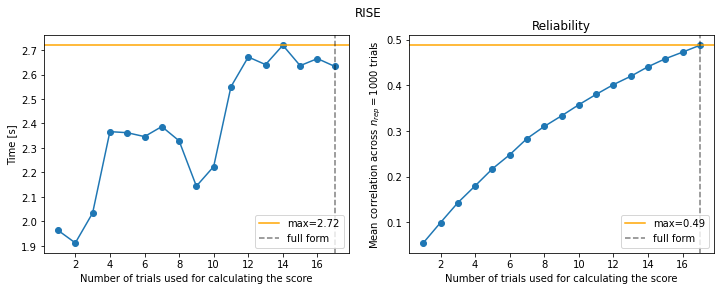

In [56]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_RISE_concat, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_RISE_concat, N, test, step=1, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_RISE_concat, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()
# 40 s which is (0.7 min) per 1 000

## SCAP
[top](#top)

In [57]:
# define manually num of trials
n_trials_per_form = 72
num_forms = 2

test="SCAP"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "SCAP-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "SCAP-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_SCAP_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'SCAP-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'SCAP-cleaned_data_rep.csv')),
])

# take only the full data
df_SCAP_concat = df_SCAP_concat[df_SCAP_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_SCAP_concat.userID.value_counts()[df_SCAP_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

Running 2 replicate studies with total 162 participants.
Series([], Name: userID, dtype: int64)


### Run SCAP score 

Total number of trials is 144.
Going over (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70) trials per task, ie. 14 items
Time per 5 trials: 2.21 s which is 0.04 min.
Time per 10 trials: 2.30 s which is 0.04 min.
Time per 15 trials: 2.59 s which is 0.04 min.
Time per 20 trials: 2.66 s which is 0.04 min.
Time per 25 trials: 2.82 s which is 0.05 min.
Time per 30 trials: 3.00 s which is 0.05 min.
Time per 35 trials: 3.04 s which is 0.05 min.
Time per 40 trials: 3.32 s which is 0.06 min.
Time per 45 trials: 3.30 s which is 0.06 min.
Time per 50 trials: 3.39 s which is 0.06 min.
Time per 55 trials: 3.41 s which is 0.06 min.
Time per 60 trials: 3.04 s which is 0.05 min.
Time per 65 trials: 3.13 s which is 0.05 min.
Time per 70 trials: 3.53 s which is 0.06 min.
Process took: 41.73 s which is 0.70 min.


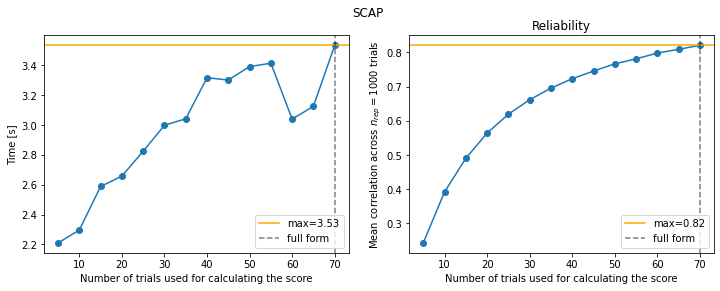

In [58]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_SCAP_concat, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_SCAP_concat, N, test,
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_SCAP_concat, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()
# 33 s (0.55 min) per 1 000

### Run SCAP Cowan

In [59]:
# how many samples we want to correlate
n_repeats = 10 ** 3
# step size
step = 2
    
# this is a bit unique since the num trials depends on the subcategories. There is 25, 23, 24 trials, so I decided
# to take the minimum, 23, because otherwise it crashes
n_trials_list = np.arange(step, (22*num_forms//2+step), step)
print(f"Going over {*n_trials_list,} trials per task, ie. {len(n_trials_list)} items")

# define corr array
scap_concat_array_corr_cowan = np.zeros((len(n_trials_list),n_repeats))
trial_time = np.zeros(len(n_trials_list))

# do statistics - define the dataframe
df_measures = pd.DataFrame()

# start the timer
start = time.time()

for k, n_trials in enumerate(n_trials_list):
    
    # start timer for trials
    start_trial = time.time()

    for i in range(n_repeats):   
        # create arrays for Cowan's k
        cowan_first = np.zeros((3,  df_SCAP_concat.userID.unique().size))
        cowan_second = np.zeros((3, df_SCAP_concat.userID.unique().size))

        # iterate over the levels with their n_trials
        for (j, lvl), trial_per_task in zip(enumerate([3,5,7]), num_forms*np.array([25,23,24])):
            # clean
            df_scap_first = None
            df_scap_second = None
            df_scap_shuffle = None
                         
            # get load 1 only
            df_scap_shuffle = df_SCAP_concat.loc[df_SCAP_concat["set_size"] == lvl, ["userID", "correct"]].sort_values(
                by=["userID"]).copy()


            # check that it's possible
            assert n_trials <= trial_per_task//2

            # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
            df_scap_first, df_scap_second = split_dataframes_faster_chunks(df_scap_shuffle, trial_per_task, n_trials, N)

            # get the Cowan measure
            cowan_first[j,:]  = lvl*( df_scap_first.groupby("userID").correct.mean()*2-1).values
            cowan_second[j,:] = lvl*(df_scap_second.groupby("userID").correct.mean()*2-1).values

        # calculate the correlation between the two groups, take only the max Cowan's k per category
        scap_concat_array_corr_cowan[k,i] = np.corrcoef(cowan_first.max(axis=0), cowan_second.max(axis=0))[1,0]
        
    ## add statistics, again, mean_p = mean

    # randomly sample number of trials per subject
    df_tmp = cowan_first.max(axis=0).copy()
    # create statistics
    df_measures = df_measures.append(pd.DataFrame({
        "n_trials": [n_trials],
        "mean": df_tmp.mean(),
        "sd": df_tmp.std(),
        "var": df_tmp.var(),
        "sem": df_tmp.std() / np.sqrt(n_trials),
        "mean_p": df_tmp.mean(),
        "var_p": df_tmp.var(),
    }))
        
    # get the time
    trial_time[k] = time.time()-start_trial
    print(f"Time per {n_trials} trials: {trial_time[k]:.2f} s which is {trial_time[k]/60:.2f} min.")        

end = time.time()
print(f"Process took: {end - start} s which is {(end - start) / 60} min.")
# 20 s per 100
# 196 s (3.2 min) per 1 000

Going over (2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22) trials per task, ie. 11 items
Time per 2 trials: 27.33 s which is 0.46 min.
Time per 4 trials: 27.30 s which is 0.46 min.
Time per 6 trials: 27.03 s which is 0.45 min.
Time per 8 trials: 28.50 s which is 0.48 min.
Time per 10 trials: 28.81 s which is 0.48 min.
Time per 12 trials: 28.78 s which is 0.48 min.
Time per 14 trials: 28.58 s which is 0.48 min.
Time per 16 trials: 29.74 s which is 0.50 min.
Time per 18 trials: 27.93 s which is 0.47 min.
Time per 20 trials: 29.29 s which is 0.49 min.
Time per 22 trials: 30.03 s which is 0.50 min.
Process took: 313.3367700576782 s which is 5.222279500961304 min.


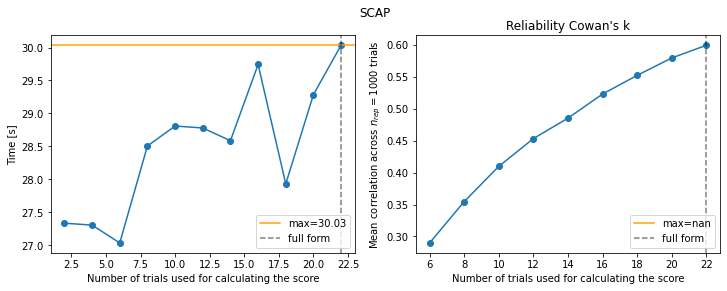

In [60]:
# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(scap_concat_array_corr_cowan, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title("Reliability Cowan's k")

plt.suptitle(test)
plt.show()

In [61]:
# save
pd.DataFrame(scap_concat_array_corr_cowan.T, columns=[f"n_trials_{x}" for x in n_trials_list]
            ).to_csv(os.path.join(path_curve_fit, f"{test}_Cowan_k_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}.csv"), index=False)


df_measures.insert(1, "reliability", np.nanmean(scap_concat_array_corr_cowan, axis=1))
df_measures.to_csv(os.path.join(path_curve_fit, 
                                f"{test}_Cowan_k_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"),
                   index=False)


test_names.append(f"{test}_Cowan_k")

## n back
[top](#top)

In [62]:
# define manually num of trials
n_trials_per_form_all = 138 # 48+45+45
n_trials_per_form_acc = 45 
num_forms = 2

test="n_back"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "nback-cleaned_data_day1.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "nback-cleaned_data_day2.csv"), usecols=['userID']).userID)
)
print(f"Running all replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_nback_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'nback-cleaned_data_day1.csv'), usecols=["userID", "level", "correct_response", "response_type", "correct"]),
    pd.read_csv(os.path.join(csv_clean_data_path, 'nback-cleaned_data_day2.csv'), usecols=["userID", "level", "correct_response", "response_type", "correct"]),
])

# take only the full data
df_nback_concat = df_nback_concat[df_nback_concat["userID"].isin(shared_participants)].reset_index(drop=True)


# should be empty -- test if people don't have more than 1 entry
print(df_nback_concat.userID.value_counts()[df_nback_concat.userID.value_counts()!=num_forms*n_trials_per_form_all])#.keys()

Running all replicate studies with total 93 participants.
Series([], Name: userID, dtype: int64)


### Run n back acc
[top](#top)

Total number of trials is 90.
Going over (2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44) trials per task, ie. 22 items
Time per 2 trials: 2.16 s which is 0.04 min.
Time per 4 trials: 2.16 s which is 0.04 min.
Time per 6 trials: 2.19 s which is 0.04 min.
Time per 8 trials: 2.19 s which is 0.04 min.
Time per 10 trials: 2.22 s which is 0.04 min.
Time per 12 trials: 2.22 s which is 0.04 min.
Time per 14 trials: 2.28 s which is 0.04 min.
Time per 16 trials: 2.30 s which is 0.04 min.
Time per 18 trials: 2.32 s which is 0.04 min.
Time per 20 trials: 2.38 s which is 0.04 min.
Time per 22 trials: 2.44 s which is 0.04 min.
Time per 24 trials: 2.46 s which is 0.04 min.
Time per 26 trials: 2.47 s which is 0.04 min.
Time per 28 trials: 2.50 s which is 0.04 min.
Time per 30 trials: 2.53 s which is 0.04 min.
Time per 32 trials: 2.54 s which is 0.04 min.
Time per 34 trials: 2.58 s which is 0.04 min.
Time per 36 trials: 2.59 s which is 0.04 min.
Time per 38 trials: 

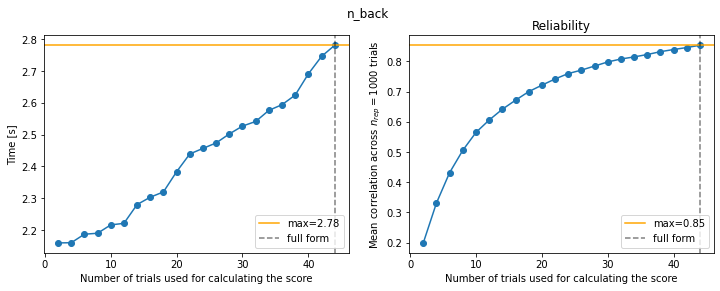

In [63]:
# select only trials with accuracy
df_nback_concat_acc = df_nback_concat[df_nback_concat["correct_response"]=='n']

corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_nback_concat_acc, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_nback_concat_acc, N, test,
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_nback_concat_acc, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()
# 33 s (0.55 min) per 1 000

### Run n back d prime
[top](#top)

[Run only second level](#Run-n-back-d-prime-second-level)

--

#### General but slow case

where I always recompute the ratio of signal and noise.

I recommend running this first to see that it really works as expected on a small number of iterations and only then run the faster version

[top](#top)

In [65]:
tests = ["d_prime", "beta", "c"]
# save the name so that we have easier job later
# test_names.append(test)
test_names += ["nback_concat_"+x for x in tests]

# num of subjects
N = len(df_nback_concat.userID.unique())

# max number of trials
total_n_trials = check_df_get_numbers(df_nback_concat, N)

assert total_n_trials == n_trials_per_form_all*num_forms

# get total number of noise and signal trials
n_noise_total =  df_nback_concat[df_nback_concat["correct_response"]=="y"].groupby('userID').correct_response.value_counts().unique()[0]
n_signal_total = df_nback_concat[df_nback_concat["correct_response"]=="n"].groupby('userID').correct_response.value_counts().unique()[0]

# check
assert n_noise_total  == 2*93
assert n_signal_total == 2*45

# check that we only have 0 and 1 as correct answers
assert len(df_nback_concat.correct.unique()) == 2

# define signal and noise ratios to speed it up
signal = n_signal_total/(total_n_trials)
noise  = n_noise_total/(total_n_trials)

#####


# how many samples we want to correlate
n_repeats = 10**1

# step size
step = 3
    
# define trials
# n_trials_list = np.arange(step, (total_n_trials + step) // 2, step)
n_trials_list = np.arange(step, (total_n_trials) // 2, step)
print(f"Going over {*n_trials_list,} trials per task, ie. {len(n_trials_list)} items")


# define corr array
nback_concat_d_array_corr = np.zeros((len(n_trials_list),n_repeats))
nback_concat_beta_array_corr = np.zeros((len(n_trials_list),n_repeats))
nback_concat_c_array_corr = np.zeros((len(n_trials_list),n_repeats))
trial_time = np.zeros(len(n_trials_list))

# define the df
df_sort = df_nback_concat.sort_values(by=["userID"])[["userID", "correct_response", "response_type"]]

# do statistics - define the dataframe
dic_measures = {"d_prime":pd.DataFrame(), "beta":pd.DataFrame(), "c":pd.DataFrame()}

# start the timer
start = time.time()

# double check that it's all possible - we will be preserving the ratio of signal and noise and that is 1:2 so 
# we need to have number of trials divisible by 3 coming in
# NOTE - it should be because of step but to be on the safe side
assert all(x%3==0 for x in n_trials_list)

for k, n_trials in enumerate(n_trials_list):
    
    # start timer for trials
    start_trial = time.time()
    
    # compute number of trials
    n_noise = 2*n_trials//3
    n_signal = n_trials//3

    # go over iterations
    for i in range(n_repeats):
        df_nback_concat_d_noise_first = None
        df_nback_concat_d_noise_second = None
        df_nback_concat_d_signal_first = None
        df_nback_concat_d_signal_second = None
        # measures
        out1=None
        out2=None
        #split dfs that will be concatenated
        df_conc1=None
        df_conc2=None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_nback_concat_d_noise_first, df_nback_concat_d_noise_second  = split_dataframes_faster_chunks(df_sort.loc[df_sort["correct_response"]=='y'], n_noise_total, n_noise, N)
        df_nback_concat_d_signal_first,df_nback_concat_d_signal_second = split_dataframes_faster_chunks(df_sort.loc[df_sort["correct_response"]=='n'], n_signal_total,n_signal,N)

        # concat back signals and noise datasets
        df_conc1 = pd.concat([df_nback_concat_d_noise_first, df_nback_concat_d_signal_first])
        df_conc2 = pd.concat([df_nback_concat_d_noise_second, df_nback_concat_d_signal_second])
        
        # get signal and noise -- NOTE: they have to be the same across all the samples so we can speed up
        signal1, noise1 = check_noise_signal(df_conc1, n_noise, n_signal, n_trials, col="correct_response", signal_label="n", noise_label="y")
        if i==0:
            print('1: ', signal1, noise1)
            assert np.isclose(signal, signal1, atol=0.2)
            
        signal2, noise2 = check_noise_signal(df_conc2, n_noise, n_signal, n_trials, col="correct_response", signal_label="n", noise_label="y")
        if i==0:
            print('2: ', signal2, noise2)
            assert np.isclose(signal, signal2, atol=0.2)
        
        
        # get the measures -- combine back the two dataframes (signal, noise) and compute d'
        out1 = calculate_d_prime(df_conc1, signal=signal1, noise=noise1, n_signal=n_signal, n_noise=n_noise, col='correct_response', beta=True, c=True)
        out2 = calculate_d_prime(df_conc2, signal=signal2, noise=noise2, n_signal=n_signal, n_noise=n_noise, col='correct_response', beta=True, c=True)

        # calculate correlation
        nback_concat_d_array_corr[k,i] = out1["d_prime"].corr(out2["d_prime"], method='pearson')
        nback_concat_beta_array_corr[k,i] = out1["beta"].corr(out2["beta"], method='pearson')  
        nback_concat_c_array_corr[k,i] = out1["c"].corr(out2["c"], method='pearson')       
        
    
    ## add statistics, again, mean_p = mean
    
    
    
    # get the time
    trial_time[k] = time.time()-start_trial
    print(f"Time per {n_trials} trials: {trial_time[k]:.2f} s which is {trial_time[k]/60:.2f} min.")         

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 20 s per iter
# 10 s () per 100

Total number of trials is 276.
Going over (3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135) trials per task, ie. 45 items
1:  0.3333333333333333 0.6666666666666666
2:  0.3333333333333333 0.6666666666666666
Time per 3 trials: 0.23 s which is 0.00 min.
1:  0.3333333333333333 0.6666666666666666
2:  0.3333333333333333 0.6666666666666666
Time per 6 trials: 0.23 s which is 0.00 min.
1:  0.3333333333333333 0.6666666666666666
2:  0.3333333333333333 0.6666666666666666
Time per 9 trials: 0.22 s which is 0.00 min.
1:  0.3333333333333333 0.6666666666666666
2:  0.3333333333333333 0.6666666666666666
Time per 12 trials: 0.22 s which is 0.00 min.
1:  0.3333333333333333 0.6666666666666666
2:  0.3333333333333333 0.6666666666666666
Time per 15 trials: 0.23 s which is 0.00 min.
1:  0.3333333333333333 0.6666666666666666
2:  0.3333333333333333 0.6666666666666666
Time pe

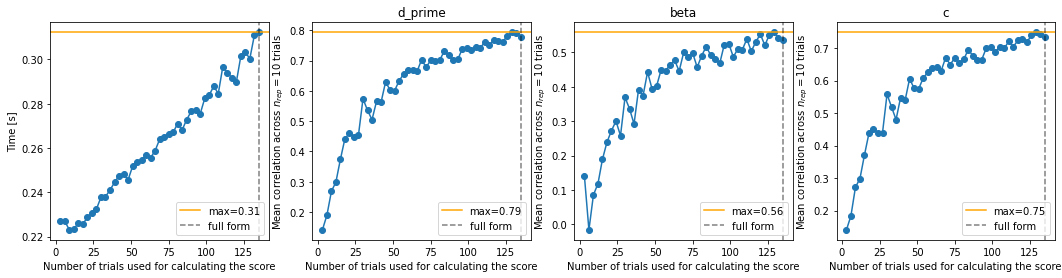

In [66]:
# plot
fig, axs = plt.subplots(1,4, figsize=(18,4))#, sharey=True)

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

for (i, tsk), arr in zip(enumerate(tests), [nback_concat_d_array_corr, nback_concat_beta_array_corr, nback_concat_c_array_corr]):

    # plot reliability
    plot_convergence(arr, n_trials_list, axs[i+1], k=num_forms//2)
    axs[i+1].set_title('Reliability')
    axs[i+1].set_title(tsk)
    
plt.show()



#### faster approach

In [67]:
tests = ["d_prime", "beta", "c"]
# save the name so that we have easier job later
# test_names.append(test)
test_names += ["nback_concat_"+x for x in tests]

# num of subjects
N = len(df_nback_concat.userID.unique())

# max number of trials
total_n_trials = check_df_get_numbers(df_nback_concat, N)

assert total_n_trials == n_trials_per_form_all*num_forms

# get total number of noise and signal trials
n_noise_total =  df_nback_concat[df_nback_concat["correct_response"]=="y"].groupby('userID').correct_response.value_counts().unique()[0]
n_signal_total = df_nback_concat[df_nback_concat["correct_response"]=="n"].groupby('userID').correct_response.value_counts().unique()[0]

# check
assert n_noise_total  == 2*93
assert n_signal_total == 2*45

# check that we only have 0 and 1 as correct answers
assert len(df_nback_concat.correct.unique()) == 2


# define signal and noise ratios to speed it up
signal = n_signal_total/(total_n_trials)
noise  = n_noise_total/(total_n_trials)


#####

# how many samples we want to correlate
n_repeats = 10**3

# step size
step = 3
    
# define trials
# n_trials_list = np.arange(step, (total_n_trials + step) // 2, step)
n_trials_list = np.arange(step, (total_n_trials) // 2, step)
print(f"Going over {*n_trials_list,} trials per task, ie. {len(n_trials_list)} items")


# define corr array
nback_concat_d_array_corr = np.zeros((len(n_trials_list),n_repeats))
nback_concat_beta_array_corr = np.zeros((len(n_trials_list),n_repeats))
nback_concat_c_array_corr = np.zeros((len(n_trials_list),n_repeats))
trial_time = np.zeros(len(n_trials_list))

# define the df
df_sort = df_nback_concat.sort_values(by=["userID"])[["userID", "correct_response", "response_type"]]

# do statistics - define the dataframe
dic_measures = {"d_prime":pd.DataFrame(), "beta":pd.DataFrame(), "c":pd.DataFrame()}

# start the timer
start = time.time()

# double check that it's all possible - we will be preserving the ratio of signal and noise and that is 1:2 so 
# we need to have number of trials divisible by 3 coming in
# NOTE - it should be because of step but to be on the safe side
assert all(x%3==0 for x in n_trials_list)

for k, n_trials in enumerate(n_trials_list):
    
    # start timer for trials
    start_trial = time.time()
    
    # compute number of trials
    n_noise = 2*n_trials//3
    n_signal = n_trials//3

    # go over iterations
    for i in range(n_repeats):
        df_nback_concat_d_noise_first = None
        df_nback_concat_d_noise_second = None
        df_nback_concat_d_signal_first = None
        df_nback_concat_d_signal_second = None
        # measures
        out1=None
        out2=None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_nback_concat_d_noise_first, df_nback_concat_d_noise_second  = split_dataframes_faster_chunks(df_sort.loc[df_sort["correct_response"]=='y'], n_noise_total, n_noise, N)
        df_nback_concat_d_signal_first,df_nback_concat_d_signal_second = split_dataframes_faster_chunks(df_sort.loc[df_sort["correct_response"]=='n'], n_signal_total,n_signal,N)

        # get the measures -- combine back the two dataframes (signal, noise) and compute d'
        out1 = calculate_d_prime(pd.concat([df_nback_concat_d_noise_first, df_nback_concat_d_signal_first]), signal=signal, noise=noise, n_signal=n_signal, n_noise=n_noise, col='correct_response', beta=True, c=True)
        out2 = calculate_d_prime(pd.concat([df_nback_concat_d_noise_second, df_nback_concat_d_signal_second]), signal=signal, noise=noise, n_signal=n_signal, n_noise=n_noise, col='correct_response', beta=True, c=True)

        # calculate correlation
        nback_concat_d_array_corr[k,i] = out1["d_prime"].corr(out2["d_prime"], method='pearson')
        nback_concat_beta_array_corr[k,i] = out1["beta"].corr(out2["beta"], method='pearson')  
        nback_concat_c_array_corr[k,i] = out1["c"].corr(out2["c"], method='pearson')  

    
    ## add statistics, again, mean_p = mean
    
    # randomly sample number of trials per subject
    out = calculate_d_prime(pd.concat([df_nback_concat_d_noise_first, df_nback_concat_d_signal_first]), signal=signal, noise=noise, n_signal=n_signal, n_noise=n_noise, col='correct_response', beta=True, c=True)
    
    for tsk in tests:
        # create statistics
        dic_measures[tsk] = dic_measures[tsk].append(pd.DataFrame({
            "n_trials": [n_trials],
            "mean": out[tsk].mean(),
            "sd": out[tsk].std(),
            "var": out[tsk].var(),
    #         "sum_subj_sd": df_tmp.groupby(["userID"]).std().correct.sum(),
            "sem": out[tsk].std() / np.sqrt(n_trials),
            "mean_p": out[tsk].mean(),
            "var_p": out[tsk].var(),
            # "sem_inverse": 1 / (df_tmp["correct"].std() / np.sqrt(n_trials)),
            # "sem_neg": -(df_tmp["correct"].std() / np.sqrt(n_trials)),
            # "1-sem": 1 - (df_tmp["correct"].std() / np.sqrt(n_trials)),
        }))
    
    
    
    # get the time
    trial_time[k] = time.time()-start_trial
    print(f"Time per {n_trials} trials: {trial_time[k]:.2f} s which is {trial_time[k]/60:.2f} min.")         

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 14 s per iter
# 696 s (11.6 min) per 1000


Total number of trials is 276.
Going over (3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135) trials per task, ie. 45 items
Time per 3 trials: 16.75 s which is 0.28 min.
Time per 6 trials: 17.01 s which is 0.28 min.
Time per 9 trials: 17.20 s which is 0.29 min.
Time per 12 trials: 16.94 s which is 0.28 min.
Time per 15 trials: 16.67 s which is 0.28 min.
Time per 18 trials: 18.65 s which is 0.31 min.
Time per 21 trials: 21.25 s which is 0.35 min.
Time per 24 trials: 19.85 s which is 0.33 min.
Time per 27 trials: 16.95 s which is 0.28 min.
Time per 30 trials: 16.13 s which is 0.27 min.
Time per 33 trials: 16.61 s which is 0.28 min.
Time per 36 trials: 17.95 s which is 0.30 min.
Time per 39 trials: 20.50 s which is 0.34 min.
Time per 42 trials: 18.66 s which is 0.31 min.
Time per 45 trials: 17.52 s which is 0.29 min.
Time per 48 trials: 17.71 s which is

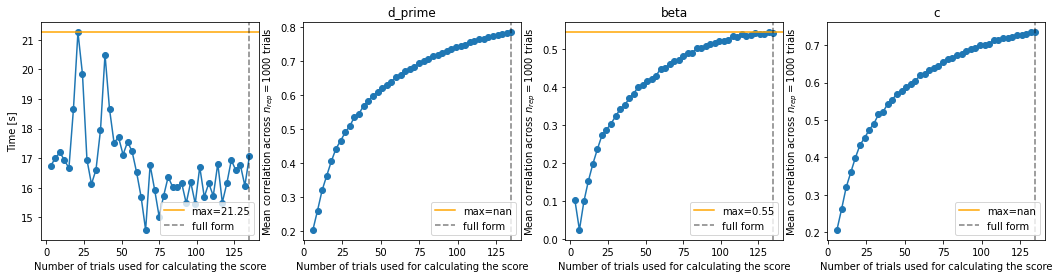

In [68]:
# plot
fig, axs = plt.subplots(1,4, figsize=(18,4))#, sharey=True)

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

for (i, tsk), arr in zip(enumerate(tests), [nback_concat_d_array_corr, nback_concat_beta_array_corr, nback_concat_c_array_corr]):

    # plot reliability
    plot_convergence(arr, n_trials_list, axs[i+1], k=num_forms//2)
    axs[i+1].set_title('Reliability')
    axs[i+1].set_title(tsk)
    
plt.show()


In [69]:
for (i, tsk), arr in zip(enumerate(tests), [nback_concat_d_array_corr, nback_concat_beta_array_corr, nback_concat_c_array_corr]):
    print(f"Saving {tsk}")
    # save
    pd.DataFrame(arr.T, columns=[f"n_trials_{x}" for x in n_trials_list]
                ).to_csv(os.path.join(path_curve_fit, f"nback_concat_{tsk}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}.csv"), index=False)


    dic_measures[tsk].insert(1, "reliability", np.nanmean(arr, axis=1))
    dic_measures[tsk].to_csv(os.path.join(path_curve_fit, 
                                    f"nback_concat_{tsk}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"),
                       index=False)


#     test_names.append(f"nback_concat_{test}")

Saving d_prime
Saving beta
Saving c


#### Run n back d prime second level
[top](#top)

#### faster approach
[top](#top)

In [70]:
# save the name so that we have easier job later
test_names += ["nback_concat_level2"+x for x in tests]

# select only second level
df_nback_concat_level2 = df_nback_concat[df_nback_concat["level"]==2].copy()

n_trials_per_form_level2 = 45


# num of subjects
N = len(df_nback_concat_level2.userID.unique())

# max number of trials
total_n_trials = check_df_get_numbers(df_nback_concat_level2, N)

assert total_n_trials == n_trials_per_form_level2*num_forms

# get total number of noise and signal trials
n_noise_total =  df_nback_concat_level2[df_nback_concat_level2["correct_response"]=="y"].groupby('userID').correct_response.value_counts().unique()[0]
n_signal_total = df_nback_concat_level2[df_nback_concat_level2["correct_response"]=="n"].groupby('userID').correct_response.value_counts().unique()[0]

# check
assert n_noise_total  == 2*31
assert n_signal_total == 2*14

# check that we only have 0 and 1 as correct answers
assert len(df_nback_concat_level2.correct.unique()) == 2


# define signal and noise ratios to speed it up
signal = n_signal_total/(total_n_trials)
noise  = n_noise_total/(total_n_trials)


#####

# how many samples we want to correlate
n_repeats = 10**3

# step size
step = 3
    
# define trials
# n_trials_list = np.arange(step, (total_n_trials + step) // 2, step)
n_trials_list = np.arange(step, (total_n_trials) // 2, step)
print(f"Going over {*n_trials_list,} trials per task, ie. {len(n_trials_list)} items")


# define corr array
nback_concat_level2_d_array_corr = np.zeros((len(n_trials_list),n_repeats))
nback_concat_level2_beta_array_corr = np.zeros((len(n_trials_list),n_repeats))
nback_concat_level2_c_array_corr = np.zeros((len(n_trials_list),n_repeats))
trial_time = np.zeros(len(n_trials_list))

# define the df
df_sort = df_nback_concat_level2.sort_values(by=["userID"])[["userID", "correct_response", "response_type"]]

# do statistics - define the dataframe
dic_measures = {"d_prime":pd.DataFrame(), "beta":pd.DataFrame(), "c":pd.DataFrame()}

# start the timer
start = time.time()

# double check that it's all possible - we will be preserving the ratio of signal and noise and that is 1:2 so 
# we need to have number of trials divisible by 3 coming in
# NOTE - it should be because of step but to be on the safe side
assert all(x%3==0 for x in n_trials_list)

for k, n_trials in enumerate(n_trials_list):
    
    # start timer for trials
    start_trial = time.time()
    
    # compute number of trials
    n_noise = 2*n_trials//3
    n_signal = n_trials//3

    # go over iterations
    for i in range(n_repeats):
        df_nback_concat_level2_d_noise_first = None
        df_nback_concat_level2_d_noise_second = None
        df_nback_concat_level2_d_signal_first = None
        df_nback_concat_level2_d_signal_second = None
        # measures
        out1=None
        out2=None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_nback_concat_level2_d_noise_first, df_nback_concat_level2_d_noise_second  = split_dataframes_faster_chunks(df_sort.loc[df_sort["correct_response"]=='y'], n_noise_total, n_noise, N)
        df_nback_concat_level2_d_signal_first,df_nback_concat_level2_d_signal_second = split_dataframes_faster_chunks(df_sort.loc[df_sort["correct_response"]=='n'], n_signal_total,n_signal,N)

        # get the measures -- combine back the two dataframes (signal, noise) and compute d'
        out1 = calculate_d_prime(pd.concat([df_nback_concat_level2_d_noise_first, df_nback_concat_level2_d_signal_first]), signal=signal, noise=noise, n_signal=n_signal, n_noise=n_noise, col='correct_response', beta=True, c=True)
        out2 = calculate_d_prime(pd.concat([df_nback_concat_level2_d_noise_second, df_nback_concat_level2_d_signal_second]), signal=signal, noise=noise, n_signal=n_signal, n_noise=n_noise, col='correct_response', beta=True, c=True)

        # calculate correlation
        nback_concat_level2_d_array_corr[k,i] = out1["d_prime"].corr(out2["d_prime"], method='pearson')
        nback_concat_level2_beta_array_corr[k,i] = out1["beta"].corr(out2["beta"], method='pearson')  
        nback_concat_level2_c_array_corr[k,i] = out1["c"].corr(out2["c"], method='pearson')  

    
    ## add statistics, again, mean_p = mean
    
    # randomly sample number of trials per subject
    out = calculate_d_prime(pd.concat([df_nback_concat_level2_d_noise_first, df_nback_concat_level2_d_signal_first]), signal=signal, noise=noise, n_signal=n_signal, n_noise=n_noise, col='correct_response', beta=True, c=True)
    
    for tsk in tests:
        # create statistics
        dic_measures[tsk] = dic_measures[tsk].append(pd.DataFrame({
            "n_trials": [n_trials],
            "mean": out[tsk].mean(),
            "sd": out[tsk].std(),
            "var": out[tsk].var(),
    #         "sum_subj_sd": df_tmp.groupby(["userID"]).std().correct.sum(),
            "sem": out[tsk].std() / np.sqrt(n_trials),
            "mean_p": out[tsk].mean(),
            "var_p": out[tsk].var(),
            # "sem_inverse": 1 / (df_tmp["correct"].std() / np.sqrt(n_trials)),
            # "sem_neg": -(df_tmp["correct"].std() / np.sqrt(n_trials)),
            # "1-sem": 1 - (df_tmp["correct"].std() / np.sqrt(n_trials)),
        }))
    
    
    
    # get the time
    trial_time[k] = time.time()-start_trial
    print(f"Time per {n_trials} trials: {trial_time[k]:.2f} s which is {trial_time[k]/60:.2f} min.")         

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 12 s per iter
# 170 s (2.8 min) per 1000



Total number of trials is 90.
Going over (3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42) trials per task, ie. 14 items
Time per 3 trials: 11.46 s which is 0.19 min.
Time per 6 trials: 11.53 s which is 0.19 min.
Time per 9 trials: 12.13 s which is 0.20 min.
Time per 12 trials: 11.71 s which is 0.20 min.
Time per 15 trials: 12.50 s which is 0.21 min.
Time per 18 trials: 11.87 s which is 0.20 min.
Time per 21 trials: 12.04 s which is 0.20 min.
Time per 24 trials: 12.60 s which is 0.21 min.
Time per 27 trials: 13.37 s which is 0.22 min.
Time per 30 trials: 21.50 s which is 0.36 min.
Time per 33 trials: 31.88 s which is 0.53 min.
Time per 36 trials: 36.07 s which is 0.60 min.
Time per 39 trials: 32.99 s which is 0.55 min.
Time per 42 trials: 21.61 s which is 0.36 min.
Process took: 253.25 s which is 4.22 min.


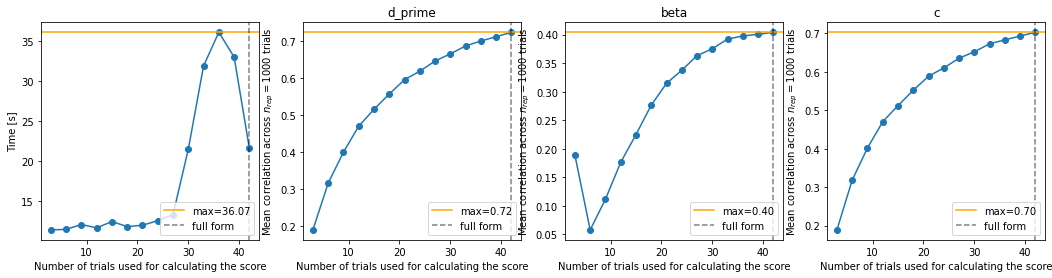

In [71]:
# plot
fig, axs = plt.subplots(1,4, figsize=(18,4))#, sharey=True)

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

for (i, tsk), arr in zip(enumerate(tests), [nback_concat_level2_d_array_corr, nback_concat_level2_beta_array_corr, nback_concat_level2_c_array_corr]):

    # plot reliability
    plot_convergence(arr, n_trials_list, axs[i+1], k=num_forms//2)
    axs[i+1].set_title('Reliability')
    axs[i+1].set_title(tsk)
    
plt.show()

In [72]:
for (i, tsk), arr in zip(enumerate(tests), [nback_concat_level2_d_array_corr, nback_concat_level2_beta_array_corr, nback_concat_level2_c_array_corr]):
    print(f"Saving {tsk}")
    # save
    pd.DataFrame(arr.T, columns=[f"n_trials_{x}" for x in n_trials_list]
                ).to_csv(os.path.join(path_curve_fit, f"nback_concat_level2_{tsk}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}.csv"), index=False)


    dic_measures[tsk].insert(1, "reliability", np.nanmean(arr, axis=1))
    dic_measures[tsk].to_csv(os.path.join(path_curve_fit, 
                                    f"nback_concat_level2_{tsk}_longitudinal_reliability_{num_forms}_chunks_psychofit_step{step}-fit.csv"),
                       index=False)


#     test_names.append(f"nback_concat_{test}")

Saving d_prime
Saving beta
Saving c


## Navon
[top](#top)

### Accuracy Navon
[top](#top)

In [73]:
# define manually num of trials
n_trials_per_form = 80
num_forms = 1

test="Navon"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "Navon-cleaned_data.csv"), usecols=['userID']).userID)#&\
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_Navon = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'Navon-cleaned_data.csv'), usecols=["userID", "correct_flt"]),
])

# take only the full data
df_Navon = df_Navon[df_Navon["userID"].isin(shared_participants)].reset_index(drop=True)

# rename col
df_Navon.rename(columns={"correct_flt":"correct"}, inplace=True)

# should be empty -- test if people don't have more than 1 entry
print(df_Navon.userID.value_counts()[df_Navon.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

Running 1 replicate studies with total 241 participants.
Series([], Name: userID, dtype: int64)


Total number of trials is 80.
Going over (2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40) trials per task, ie. 20 items
Time per 2 trials: 2.60 s which is 0.04 min.
Time per 4 trials: 2.57 s which is 0.04 min.
Time per 6 trials: 2.60 s which is 0.04 min.
Time per 8 trials: 2.61 s which is 0.04 min.
Time per 10 trials: 2.76 s which is 0.05 min.
Time per 12 trials: 4.92 s which is 0.08 min.
Time per 14 trials: 7.84 s which is 0.13 min.
Time per 16 trials: 6.83 s which is 0.11 min.
Time per 18 trials: 4.78 s which is 0.08 min.
Time per 20 trials: 4.47 s which is 0.07 min.
Time per 22 trials: 4.08 s which is 0.07 min.
Time per 24 trials: 3.83 s which is 0.06 min.
Time per 26 trials: 3.67 s which is 0.06 min.
Time per 28 trials: 3.75 s which is 0.06 min.
Time per 30 trials: 3.52 s which is 0.06 min.
Time per 32 trials: 3.54 s which is 0.06 min.
Time per 34 trials: 3.46 s which is 0.06 min.
Time per 36 trials: 3.52 s which is 0.06 min.
Time per 38 trials: 6.90 s w

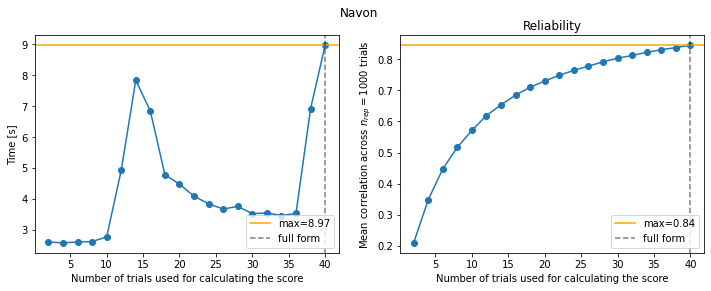

In [74]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_Navon, N)

# how many samples we want to correlate
n_repeats = 10**3


# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_Navon, N, test,
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_Navon, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()

# 60 s (1 min) per 1 000

## VET birds
[top](#top)

In [75]:
# define manually num of trials
n_trials_per_form = 51
num_forms = 1

test="VET_birds"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "VET_birds-cleaned_data.csv"), usecols=['userID']).userID)#&\
#     set(pd.read_csv(os.path.join(csv_clean_data_path, "VET_birds-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_VET_birds_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'VET_birds-cleaned_data.csv')),
#     pd.read_csv(os.path.join(csv_clean_data_path, 'VET_birds-cleaned_data_rep.csv')),
])

# take only the full data
df_VET_birds_concat = df_VET_birds_concat[df_VET_birds_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_VET_birds_concat.userID.value_counts()[df_VET_birds_concat.userID.value_counts()>num_forms*n_trials_per_form])#.keys()


Running 1 replicate studies with total 118 participants.
Series([], Name: userID, dtype: int64)


Total number of trials is 51.
Going over (2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24) trials per task, ie. 12 items
Time per 2 trials: 3.33 s which is 0.06 min.
Time per 4 trials: 3.09 s which is 0.05 min.
Time per 6 trials: 2.94 s which is 0.05 min.
Time per 8 trials: 2.87 s which is 0.05 min.
Time per 10 trials: 2.75 s which is 0.05 min.
Time per 12 trials: 2.72 s which is 0.05 min.
Time per 14 trials: 2.62 s which is 0.04 min.
Time per 16 trials: 2.73 s which is 0.05 min.
Time per 18 trials: 2.70 s which is 0.04 min.
Time per 20 trials: 2.65 s which is 0.04 min.
Time per 22 trials: 2.65 s which is 0.04 min.
Time per 24 trials: 2.69 s which is 0.04 min.
Process took: 33.74 s which is 0.56 min.


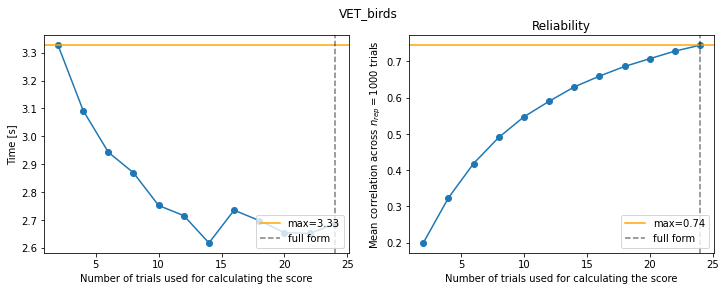

In [76]:

corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_VET_birds_concat, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_VET_birds_concat, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_VET_birds_concat, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()

# 24 s (0.4 min) per 1 000

## VET leaves
[top](#top)

In [77]:
# define manually num of trials
n_trials_per_form = 51
num_forms = 1

test="VET_leaves"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "VET_leaves-cleaned_data.csv"), usecols=['userID']).userID)#&\
#     set(pd.read_csv(os.path.join(csv_clean_data_path, "VET_leaves-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_VET_leaves_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'VET_leaves-cleaned_data.csv')),
#     pd.read_csv(os.path.join(csv_clean_data_path, 'VET_leaves-cleaned_data_rep.csv')),
])

# take only the full data
df_VET_leaves_concat = df_VET_leaves_concat[df_VET_leaves_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_VET_leaves_concat.userID.value_counts()[df_VET_leaves_concat.userID.value_counts()>num_forms*n_trials_per_form])#.keys()


Running 1 replicate studies with total 119 participants.
Series([], Name: userID, dtype: int64)


Total number of trials is 51.
Going over (2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24) trials per task, ie. 12 items
Time per 2 trials: 2.23 s which is 0.04 min.
Time per 4 trials: 2.28 s which is 0.04 min.
Time per 6 trials: 2.29 s which is 0.04 min.
Time per 8 trials: 2.36 s which is 0.04 min.
Time per 10 trials: 2.35 s which is 0.04 min.
Time per 12 trials: 2.42 s which is 0.04 min.
Time per 14 trials: 2.43 s which is 0.04 min.
Time per 16 trials: 2.50 s which is 0.04 min.
Time per 18 trials: 2.51 s which is 0.04 min.
Time per 20 trials: 2.54 s which is 0.04 min.
Time per 22 trials: 2.60 s which is 0.04 min.
Time per 24 trials: 2.82 s which is 0.05 min.
Process took: 29.35 s which is 0.49 min.


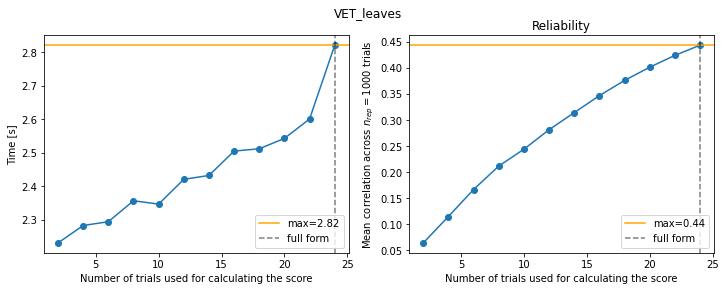

In [78]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_VET_leaves_concat, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_VET_leaves_concat, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_VET_leaves_concat, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()

# 24 s (0.4 min) per 1 000

## VET planes
[top](#top)

In [79]:
# define manually num of trials
n_trials_per_form = 51
num_forms = 1

test="VET_planes"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "VET_planes-cleaned_data.csv"), usecols=['userID']).userID)#&\
#     set(pd.read_csv(os.path.join(csv_clean_data_path, "VET_planes-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_VET_planes_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'VET_planes-cleaned_data.csv')),
#     pd.read_csv(os.path.join(csv_clean_data_path, 'VET_planes-cleaned_data_rep.csv')),
])

# take only the full data
df_VET_planes_concat = df_VET_planes_concat[df_VET_planes_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_VET_planes_concat.userID.value_counts()[df_VET_planes_concat.userID.value_counts()>num_forms*n_trials_per_form])#.keys()

Running 1 replicate studies with total 107 participants.
Series([], Name: userID, dtype: int64)


Total number of trials is 51.
Going over (2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24) trials per task, ie. 12 items
Time per 2 trials: 2.08 s which is 0.03 min.
Time per 4 trials: 2.20 s which is 0.04 min.
Time per 6 trials: 2.18 s which is 0.04 min.
Time per 8 trials: 2.53 s which is 0.04 min.
Time per 10 trials: 2.38 s which is 0.04 min.
Time per 12 trials: 2.48 s which is 0.04 min.
Time per 14 trials: 3.57 s which is 0.06 min.
Time per 16 trials: 3.00 s which is 0.05 min.
Time per 18 trials: 3.13 s which is 0.05 min.
Time per 20 trials: 2.99 s which is 0.05 min.
Time per 22 trials: 2.98 s which is 0.05 min.
Time per 24 trials: 2.87 s which is 0.05 min.
Process took: 32.38 s which is 0.54 min.


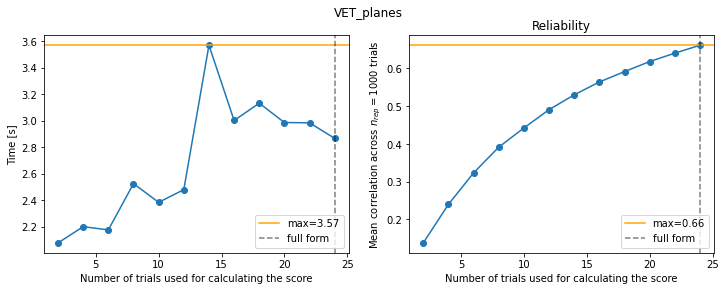

In [80]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_VET_planes_concat, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_VET_planes_concat, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_VET_planes_concat, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()

# 24 s (0.4 min) per 1 000

## VET planes, birds, leaves
[top](#top)

In [81]:
# define manually num of trials
n_trials_per_form = 51
num_forms = 3

test="VET_birds_planes_leaves"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "VET_planes-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "VET_birds-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "VET_leaves-cleaned_data.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_VET_planes_birds_leaves_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'VET_planes-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'VET_birds-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'VET_leaves-cleaned_data.csv')),
#     pd.read_csv(os.path.join(csv_clean_data_path, 'VET_planes-cleaned_data_rep.csv')),
])

# take only the full data
df_VET_planes_birds_leaves_concat = df_VET_planes_birds_leaves_concat[df_VET_planes_birds_leaves_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_VET_planes_birds_leaves_concat.userID.value_counts()[df_VET_planes_birds_leaves_concat.userID.value_counts()>num_forms*n_trials_per_form])#.keys()

Running 3 replicate studies with total 106 participants.
Series([], Name: userID, dtype: int64)


Total number of trials is 153.
Going over (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75) trials per task, ie. 15 items
Time per 5 trials: 2.54 s which is 0.04 min.
Time per 10 trials: 2.49 s which is 0.04 min.
Time per 15 trials: 2.41 s which is 0.04 min.
Time per 20 trials: 2.50 s which is 0.04 min.
Time per 25 trials: 2.67 s which is 0.04 min.
Time per 30 trials: 2.66 s which is 0.04 min.
Time per 35 trials: 2.73 s which is 0.05 min.
Time per 40 trials: 2.86 s which is 0.05 min.
Time per 45 trials: 2.98 s which is 0.05 min.
Time per 50 trials: 3.17 s which is 0.05 min.
Time per 55 trials: 3.16 s which is 0.05 min.
Time per 60 trials: 3.13 s which is 0.05 min.
Time per 65 trials: 3.12 s which is 0.05 min.
Time per 70 trials: 3.18 s which is 0.05 min.
Time per 75 trials: 3.24 s which is 0.05 min.
Process took: 42.86 s which is 0.71 min.


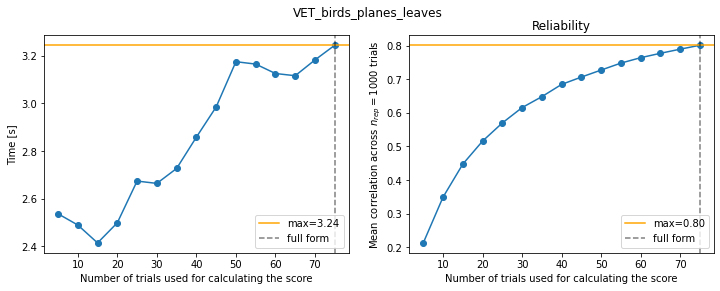

In [82]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_VET_planes_birds_leaves_concat, N)

# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_VET_planes_birds_leaves_concat, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_VET_planes_birds_leaves_concat, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()

# 24 s (0.4 min) per 1 000

In [83]:
print(len(test_names))
test_names

44


['CCMT',
 'CFMT',
 'car_matching',
 'emotion_matching',
 'emotion_labelling',
 'FMP',
 'GFMT',
 'MST',
 'MST_REC',
 'MST_LDI',
 'PIM_MC_hobby',
 'PIM_MC_vice',
 'PIM_MC_country',
 'PIM_MC_code_name',
 'PIM_MC',
 'PIM_recog',
 'PIM_recog_scaled_conf',
 'PGNG',
 'PGNG_PCIT_l2',
 'PGNG_PCIT_l3',
 'PGNG_PCIT',
 'PGNG_PCTT_l0',
 'PGNG_PCTT_l1',
 'PGNG_PCTT_l2',
 'PGNG_PCTT_l3',
 'PGNG_PCTT',
 'RISE',
 'SCAP',
 'SCAP_Cowan_k',
 'n_back',
 'nback_concat_d_prime',
 'nback_concat_beta',
 'nback_concat_c',
 'nback_concat_d_prime',
 'nback_concat_beta',
 'nback_concat_c',
 'nback_concat_level2d_prime',
 'nback_concat_level2beta',
 'nback_concat_level2c',
 'Navon',
 'VET_birds',
 'VET_leaves',
 'VET_planes',
 'VET_birds_planes_leaves']


 
 ---
 
 ['CCMT',
 'CFMT',
 'car_matching',
 'emotion_matching',
 'emotion_labelling',
 'FMP',
 'GFMT',
 'MST',
 'MST_REC',
 'MST_LDI',
 'PIM_MC_hobby',
 'PIM_MC_vice',
 'PIM_MC_country',
 'PIM_MC_code_name',
 'PIM_MC',
 'PIM_recog',
 'PIM_recog_scaled_conf',
 'PGNG',
 'PGNG_PCIT_l2',
 'PGNG_PCIT_l3',
 'PGNG_PCIT',
 'PGNG_PCTT_l0',
 'PGNG_PCTT_l1',
 'PGNG_PCTT_l2',
 'PGNG_PCTT_l3',
 'PGNG_PCTT',
 'RISE',
 'SCAP',
 'SCAP_Cowan_k',
 'n_back',
 'nback_concat_d_prime',
 'nback_concat_beta',
 'nback_concat_c',
 'nback_concat_d_prime',
 'nback_concat_beta',
 'nback_concat_c',
 'nback_concat_level2d_prime',
 'nback_concat_level2beta',
 'nback_concat_level2c',
 'Navon',
 'VET_birds',
 'VET_leaves',
 'VET_planes',
 'VET_birds_planes_leaves']

## Plot the curves
[top](#top)

nback_concat_level2d_prime
nback_concat_level2beta
nback_concat_level2c


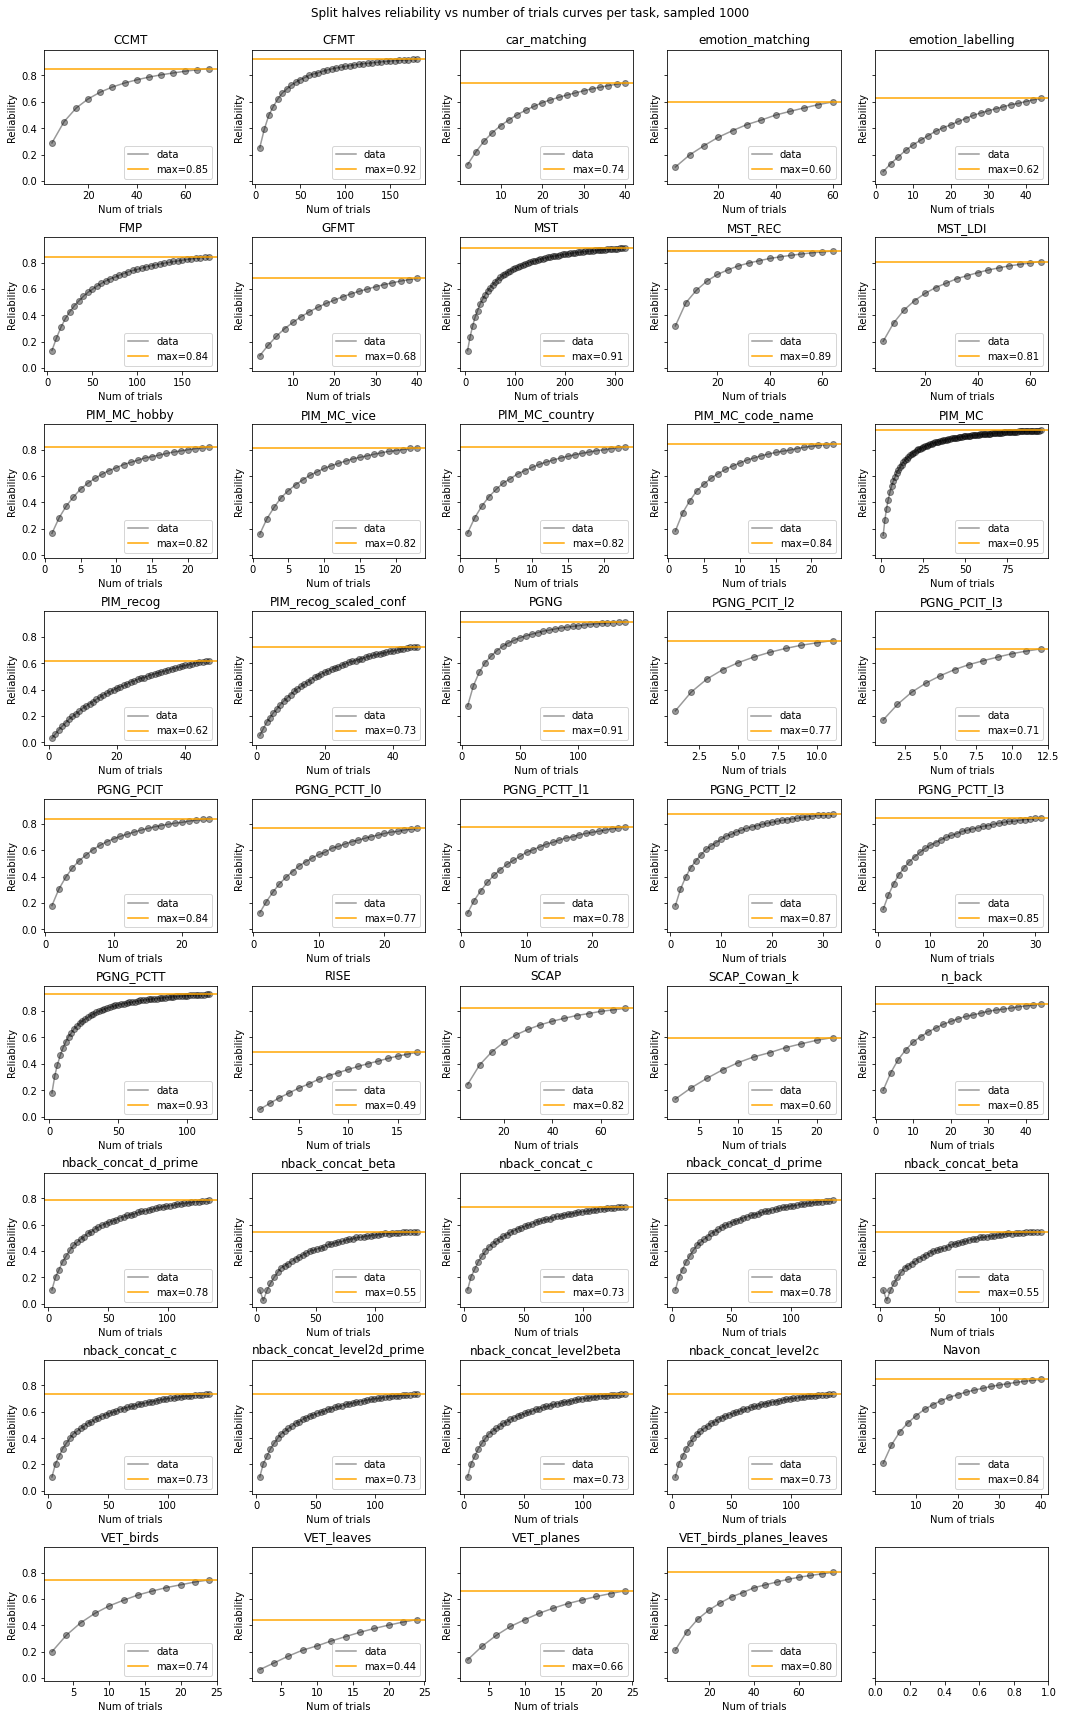

In [86]:
# # load dataset with num of trials per form 
# df_trials = pd.read_csv(os.path.join(csv_clean_data_path,'tasks-num_trials.csv'))

fig, axs = plt.subplots(9, 5, figsize=(18,30), sharey=True)
plt.subplots_adjust(hspace=0.4)

for tsk, ax in zip(test_names, axs.flatten()):
    df_tmp = None
    # find the file
    try:
        file = [i for i in os.listdir(path_curve_fit) if i.startswith(tsk+'_long') and i.endswith('-fit.csv')][0]
    except IndexError:
        print(tsk)
    df_tmp = pd.read_csv(os.path.join(path_curve_fit, file))
    
    ax.plot(df_tmp["n_trials"], df_tmp["reliability"], c='k', label="data", alpha=0.4)
    ax.scatter(df_tmp["n_trials"], df_tmp["reliability"], c='k', alpha=0.4)
    # add max label
    ax.axhline(df_tmp["reliability"].max(), c="orange", label=f"max={df_tmp['reliability'].max():.2f}")  

    # this is wrong and I don't know how to do that
#     # add form label
#     ax.axvline(df_trials.loc[df_trials["Task"].str.startswith(tsk), "num_trials"].values[0], c="k", ls='--', alpha=0.5, label="full form")
    
    ax.set_title(tsk)
    ax.set_xlabel("Num of trials")
    ax.set_ylabel("Reliability")
    
    ax.legend(loc="lower right")
    
plt.suptitle("Split halves reliability vs number of trials curves per task, sampled 1000", y=.9)

plt.show()

In [87]:
%load_ext watermark

%watermark -a 'Jan Kadlec' -nmvu --iv

Author: Jan Kadlec

Last updated: Sat Jun 10 2023

Python implementation: CPython
Python version       : 3.8.11
IPython version      : 7.26.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 22.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

sys       : 3.8.11 (default, Aug  6 2021, 08:56:27) 
[Clang 10.0.0 ]
numpy     : 1.19.1
matplotlib: 3.6.2
pandas    : 1.2.4
seaborn   : 0.11.1



[top](#top)

### Run one form for the paper
[top](#top)

In [135]:
# define manually num of trials
n_trials_per_form = 72
num_forms = 1

test="CFMT_original"
# save the name so that we have easier job later
# test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT-cleaned_data.csv"), usecols=['userID']).userID)#&\
#     set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_Aus-cleaned_data.csv"), usecols=['userID']).userID)&\
#     set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_F-cleaned_data.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_CFMT_orig = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT-cleaned_data.csv')),
#     pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_Aus-cleaned_data.csv')),
#     pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_F-cleaned_data.csv')),
])

# take only the full data
df_CFMT_orig = df_CFMT_orig[df_CFMT_orig["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_CFMT_orig.userID.value_counts()[df_CFMT_orig.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

Running 1 replicate studies with total 234 participants.
Series([], Name: userID, dtype: int64)


Total number of trials is 72.
Going over (2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36) trials per task, ie. 18 items
Time per 2 trials: 2.59 s which is 0.04 min.
Time per 4 trials: 2.48 s which is 0.04 min.
Time per 6 trials: 2.62 s which is 0.04 min.
Time per 8 trials: 2.72 s which is 0.05 min.
Time per 10 trials: 2.65 s which is 0.04 min.
Time per 12 trials: 2.70 s which is 0.04 min.
Time per 14 trials: 2.77 s which is 0.05 min.
Time per 16 trials: 2.82 s which is 0.05 min.
Time per 18 trials: 2.95 s which is 0.05 min.
Time per 20 trials: 3.11 s which is 0.05 min.
Time per 22 trials: 3.40 s which is 0.06 min.
Time per 24 trials: 3.68 s which is 0.06 min.
Time per 26 trials: 3.80 s which is 0.06 min.
Time per 28 trials: 4.09 s which is 0.07 min.
Time per 30 trials: 4.38 s which is 0.07 min.
Time per 32 trials: 4.31 s which is 0.07 min.
Time per 34 trials: 4.44 s which is 0.07 min.
Time per 36 trials: 4.61 s which is 0.08 min.
Process took: 60.10 s which is 1.00 

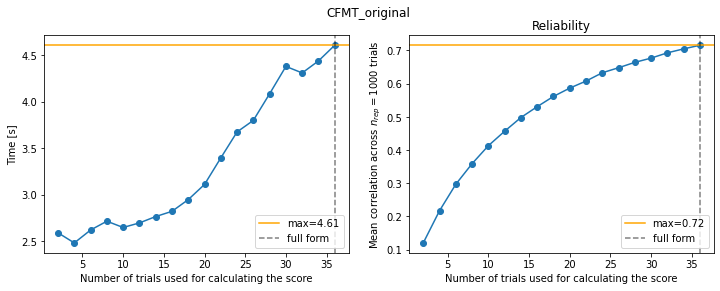

In [136]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_CFMT_orig, N)

# how many samples we want to correlate
n_repeats = 10**3


# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_CFMT_orig, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_CFMT_orig, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()

# 60 s (1 min) per 1 000

#### Run three full forms
[top](#top)

In [155]:
# define manually num of trials
n_trials_per_form = 72
num_forms = 3

test="CFMT"#_3forms"
# save the name so that we have easier job later
test_names.append(test)

# load participants per each of the 4 forms
f2 = set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_F2-cleaned_data.csv"), usecols=['userID']).userID)
f = set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_F-cleaned_data.csv"), usecols=['userID']).userID)
aus2 = set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_Aus2-cleaned_data.csv"), usecols=['userID']).userID)
aus = set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_Aus-cleaned_data.csv"), usecols=['userID']).userID)

# select participants from the second who do not have the first to include them
take_aus2 = set(aus2) - set(aus)  # take from aus 2 everyone who does not have aus 1
take_f2 = set(f2) - set(f)  # take from female 2 everyone who does not have female 1

# get participants who have all data
shared_participants = list(set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT-cleaned_data.csv"), usecols=['userID']).userID)&\
                           (aus|aus2) & (f|f2))


print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets, condition the loading on the given subjects, see
# https://stackoverflow.com/questions/28239529/conditional-row-read-of-csv-in-pandas
# NOTE -- you have to AND the shared participants and the ones that you want to take from second Aus and F
df_CFMT_concat_3forms = pd.concat([
    (pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT-cleaned_data.csv'))[lambda x: x['userID'].isin(shared_participants)]),
    (pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_Aus2-cleaned_data.csv'))[lambda x: x['userID'].isin(set(shared_participants) & take_aus2)]),
    (pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_F2-cleaned_data.csv'))[lambda x: x['userID'].isin(set(shared_participants) & take_f2)]),
    (pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_Aus-cleaned_data.csv'))[lambda x: x['userID'].isin(shared_participants)]),
    (pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_F-cleaned_data.csv'))[lambda x: x['userID'].isin(shared_participants)]),
])

# take only the full data
df_CFMT_concat_3forms = df_CFMT_concat_3forms[df_CFMT_concat_3forms["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_CFMT_concat_3forms.userID.value_counts()[df_CFMT_concat_3forms.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

Running 3 replicate studies with total 128 participants.
Series([], Name: userID, dtype: int64)


Total number of trials is 216.
Going over (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105) trials per task, ie. 21 items
Time per 5 trials: 2.48 s which is 0.04 min.
Time per 10 trials: 2.50 s which is 0.04 min.
Time per 15 trials: 2.51 s which is 0.04 min.
Time per 20 trials: 2.67 s which is 0.04 min.
Time per 25 trials: 2.60 s which is 0.04 min.
Time per 30 trials: 2.70 s which is 0.04 min.
Time per 35 trials: 2.83 s which is 0.05 min.
Time per 40 trials: 2.89 s which is 0.05 min.
Time per 45 trials: 2.96 s which is 0.05 min.
Time per 50 trials: 3.05 s which is 0.05 min.
Time per 55 trials: 3.09 s which is 0.05 min.
Time per 60 trials: 3.25 s which is 0.05 min.
Time per 65 trials: 3.28 s which is 0.05 min.
Time per 70 trials: 3.38 s which is 0.06 min.
Time per 75 trials: 3.64 s which is 0.06 min.
Time per 80 trials: 3.51 s which is 0.06 min.
Time per 85 trials: 3.62 s which is 0.06 min.
Time per 90 trials: 3.95 s which is 0.07 min.
Time per 95 tri

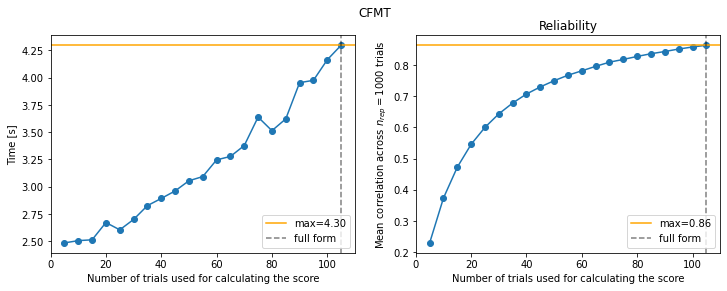

In [156]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(shared_participants)
# max number of trials
total_n_trials = check_df_get_numbers(df_CFMT_concat_3forms, N)

# how many samples we want to correlate
n_repeats = 10**3


# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_CFMT_concat_3forms, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_CFMT_concat_3forms, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()

# 60 s (1 min) per 1 000

---

In [157]:
# define manually num of trials
n_trials_per_form = 48
num_forms = 1

test="emotion_labelling_orig"
# save the name so that we have easier job later
# test_names.append(test)

# load the first set
df_emotion_labelling = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_labelling-cleaned_data.csv"))
df_emotion_labelling["correct"] = df_emotion_labelling["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print("Test first set")
print(df_emotion_labelling.userID.value_counts()[df_emotion_labelling.userID.value_counts()!=n_trials_per_form])#.keys()

# df_emotion_labelling_stand = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_labelling_rep-cleaned_data.csv"))
# df_emotion_labelling_stand["correct"] = df_emotion_labelling_stand["correct"].astype(float)

# # should be empty -- test if people don't have more than 1 entry
# print("\nTest second set")
# print(df_emotion_labelling_stand.userID.value_counts()[df_emotion_labelling_stand.userID.value_counts()>100])#.keys()


######

# df_emotion_labelling_stand["target"] = df_emotion_labelling_stand["target"].str.split('/').str[-1]

# # get participants who have both data
# shared_participants = list(set(df_emotion_labelling['userID'])&set(df_emotion_labelling_stand['userID']))

# # get target set of original stimuli
# target_set = df_emotion_labelling.target.unique()

# shared_target = list(set(df_emotion_labelling['target'])&set(df_emotion_labelling_stand['target']))
# print(f"Running all replicate studies with total {len(shared_participants)} participants and {len(shared_target)} stimuli.")

# df_emotion_labelling_concat = pd.concat([
#     df_emotion_labelling_stand.loc[(df_emotion_labelling_stand["target"].isin(shared_target))&\
#                                    (df_emotion_labelling_stand["userID"].isin(shared_participants))].copy(),
#     df_emotion_labelling.loc[(df_emotion_labelling["target"].isin(shared_target))&\
#                              (df_emotion_labelling["userID"].isin(shared_participants))].copy()
# ])

# # should be empty -- test if people don't have more than 1 entry
# print("\nTest combined set")
# print(df_emotion_labelling_concat.userID.value_counts()[df_emotion_labelling_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()
# # this has for some reason a different count



Test first set
Series([], Name: userID, dtype: int64)


Total number of trials is 48.
Going over (2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24) trials per task, ie. 12 items
Time per 2 trials: 2.37 s which is 0.04 min.
Time per 4 trials: 2.32 s which is 0.04 min.
Time per 6 trials: 2.45 s which is 0.04 min.
Time per 8 trials: 2.45 s which is 0.04 min.
Time per 10 trials: 2.62 s which is 0.04 min.
Time per 12 trials: 2.70 s which is 0.04 min.
Time per 14 trials: 2.70 s which is 0.05 min.
Time per 16 trials: 2.79 s which is 0.05 min.
Time per 18 trials: 2.80 s which is 0.05 min.
Time per 20 trials: 2.86 s which is 0.05 min.
Time per 22 trials: 2.99 s which is 0.05 min.
Time per 24 trials: 2.97 s which is 0.05 min.
Process took: 32.01 s which is 0.53 min.


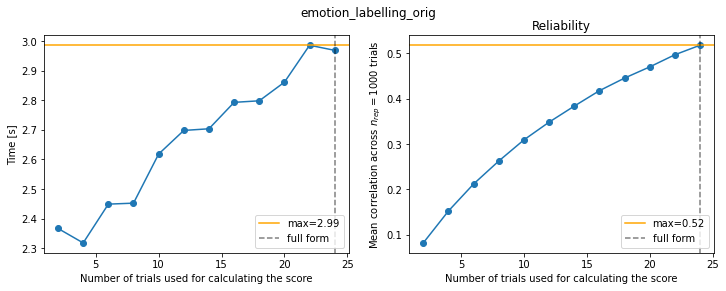

In [158]:
corr_array, trial_time, n_trials_list = None, None, None

# num of subjects
N = len(df_emotion_labelling["userID"].unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_emotion_labelling, N)


# how many samples we want to correlate
n_repeats = 10**3

# run the simulation
corr_array, trial_time, n_trials_list = run_reliability_estimate4many_trials(total_n_trials, df_emotion_labelling, N, test, 
                                                                             n_repeats=n_repeats, num_forms=num_forms,
                                                                             path_curve_fit=path_curve_fit)

# get statistics of the task
_ = get_statistics4many_trials(df_emotion_labelling, n_trials_list, save_merge=True, path=path_curve_fit, 
                               file=f"{test}_longitudinal_reliability_{num_forms}{label}_chunks_psychofit_step{n_trials_list[-1]//len(n_trials_list)}-fit.csv"
                               )

# plot
fig, axs = plt.subplots(1,2, figsize=(12,4))

# plot time
plot_convergence(trial_time.reshape(-1,1), n_trials_list, axs[0], k=num_forms//2)
axs[0].set_ylabel('Time [s]')

# plot reliability
plot_convergence(corr_array, n_trials_list, axs[1], k=num_forms//2)
axs[1].set_title('Reliability')
plt.suptitle(test)
plt.show()

# 49 s (0.8 min) per 1 000

[top](#top)